In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [4]:
def entire_Graph():
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))

            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    G.nodes[i]['frequency'] += 1
                else:
                    G.add_node(i, frequency=1)
            # 엣지 ij 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 weight 추가
        f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [5]:
def subject_graph(N, file_name, fig_name):
    G = nx.Graph()

    f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    plt.title(fig_name, fontsize=15)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size = 100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [6]:
def graph(N, file_name):
    G = nx.Graph()

    f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"Eng_All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [7]:
def basic_info(G):
    
    hist_wordFreq = []
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_wordFreq.append(G.nodes[i]['frequency'])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'WordFreq avg: {round(np.average(hist_wordFreq), 2)}, WordFreq std: {round(np.std(hist_wordFreq), 2)}')
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    
    return hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight

In [8]:
def hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):

    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [9]:
def power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):
    
    compare_lst = ['exponential', 'truncated_power_law', 'lognormal']
    
    plt.figure(figsize=(13,4), dpi=300)

    plt.subplot(1,4,1)
    plt.title('Dist. of word frequency')
    fit = powerlaw.Fit(hist_wordFreq)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    plt.ylabel('Probability')
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"1: Pass, {fit.power_law.alpha}\n")
    
    plt.subplot(1,4,2)
    plt.title('Dist. of degree')
    fit = powerlaw.Fit(hist_edges)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"2: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,3)
    plt.title('Dist. of node strength')
    fit = powerlaw.Fit(hist_nodeWeight)
    fig2 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig2)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"3: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,4)
    plt.title('Dist. of edge weight')
    fit = powerlaw.Fit(hist_edgeWeight)
    fig3 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig3)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"4: Pass, {fit.power_law.alpha}\n")

In [10]:
def info(G):
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}

    node_degree = dict(G.degree())

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # betweenness centrality 계산
    betweenness_centrality = nx.current_flow_betweenness_centrality(G, weight='weight')

    # 결과 출력
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df1 = pd.DataFrame(data, columns=['Node_F','Node Frequency'])

    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df1,df2,df3,df4,df5],axis=1)
    
    return df

# 키워드 추출

In [13]:
result = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(data, columns=['Node_F',file])
    result = pd.concat([result, df], axis=1)

print('Node Frequency')
result.head(10)

Node Frequency


Node_F  Total         Node_F  0306         Node_F  0709  \
0        Explain     49            Use  16.0        Explain  12.0   
1            Use     38         Object  12.0         Object   8.0   
2  Everyday_life     27  Everyday_life  10.0            Use   7.0   
3         Object     26        Observe  10.0  Everyday_life   7.0   
4        Various     24        Inspect   9.0         Motion   7.0   
5        Example     22       Property   8.0         Matter   6.0   
6     Understand     22        Explain   8.0        Express   6.0   
7      Applicate     21     Phenomenon   6.0     Understand   6.0   
8        Inspect     19        Compare   6.0        Feature   5.0   
9         Matter     15            Gas   5.0   Relationship   5.0   

          Node_F   10             Node_F  11_phy      Node_F  12_phy_cm  \
0        Various  6.0            Explain     9.0     Explain       10.0   
1          Earth  5.0            Various     4.0  Understand        9.0   
2     Technology  4.0              Apply     4.0         Use        7.0   
3  Everyday_life  4.0            Example     4.0     Various        5.0   
4        Measure  3.0          Principle     4.0     Example        5.0   
5         Nature  3.0          Applicate     4.0      Object        4.0   
6        Explain  3.0              Light     4.0   Applicate        4.0   
7        Meaning  3.0  Mechanical_energy     3.0      Motion        3.0   
8      Applicate  3.0          Transform     3.0        Heat        3.0   
9    Composition  3.0             Energy     3.0       Force        2.0   

       Node_F  12_phy_eqm  
0     Explain         7.0  
1  Technology         7.0  
2   Applicate         6.0  
3       Light         4.0  
4   Principle         4.0  
5     Inspect         4.0  
6      Reason         3.0  
7     Example         3.0  
8         Use         3.0  
9  Understand         3.0

In [14]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total        Node_NS   0306        Node_NS   0709  \
0        Explain    379            Use  100.0        Explain  102.0   
1            Use    309  Everyday_life   73.0  Everyday_life   71.0   
2  Everyday_life    247        Inspect   65.0            Use   69.0   
3        Various    234        Observe   64.0     Understand   61.0   
4     Understand    222         Object   64.0         Object   61.0   
5      Applicate    214        Explain   45.0        Express   56.0   
6        Example    185       Property   43.0        Feature   49.0   
7         Object    171         Method   39.0        Various   46.0   
8        Inspect    171     Phenomenon   38.0         Motion   46.0   
9     Technology    150        Example   34.0         Matter   45.0   

         Node_NS    10     Node_NS  11_phy     Node_NS  12_phy_cm  \
0        Various  65.0     Explain    75.0     Explain       88.0   
1     Technology  52.0       Light    40.0  Understand       85.0   
2          Earth  52.0   Applicate    39.0         Use       62.0   
3  Everyday_life  43.0   Principle    37.0     Example       52.0   
4      Applicate  42.0     Various    35.0     Various       49.0   
5        Measure  38.0       Apply    33.0   Applicate       49.0   
6         Nature  37.0     Example    30.0      Object       29.0   
7        Meaning  35.0         Use    30.0     Inspect       26.0   
8      Procedure  35.0      Energy    26.0        Heat       26.0   
9    Composition  33.0  Technology    25.0      Motion       25.0   

       Node_NS  12_phy_eqm  
0   Technology        61.0  
1    Applicate        53.0  
2        Light        44.0  
3      Explain        42.0  
4    Principle        38.0  
5      Inspect        38.0  
6    Recognize        37.0  
7      Digital        33.0  
8  Probability        32.0  
9   Understand        31.0

In [15]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total        Node_BC      0306        Node_BC      0709  \
0        Explain  0.157062            Use  0.217404        Explain  0.203593   
1            Use  0.117353         Object  0.185977  Everyday_life  0.137948   
2     Understand  0.097690        Observe  0.180783         Object  0.131425   
3  Everyday_life  0.086937  Everyday_life  0.140524            Use  0.127234   
4        Various  0.084668        Inspect  0.131860         Motion  0.124501   
5      Applicate  0.077696        Explain  0.123765     Understand  0.117064   
6         Object  0.070829        Compare  0.109377        Express  0.109710   
7        Example  0.063079       Property  0.092532         Matter  0.098252   
8        Inspect  0.060435     Phenomenon  0.082280   Relationship  0.092026   
9      Principle  0.056064         Method  0.080676      Procedure  0.083015   

         Node_BC        10      Node_BC    11_phy        Node_BC  12_phy_cm  \
0        Various  0.178566      Explain  0.355189        Explain   0.319073   
1          Apply  0.174896        Apply  0.175339     Understand   0.316466   
2          Earth  0.170978      Various  0.175326            Use   0.194349   
3     Technology  0.139082  Demonstrate  0.143430        Various   0.162439   
4  Everyday_life  0.135013    Principle  0.141487        Example   0.152214   
5      Procedure  0.109882      Example  0.139287      Applicate   0.148446   
6        Meaning  0.106438        Light  0.121124           Heat   0.088626   
7      Applicate  0.094342    Applicate  0.107025         Object   0.071094   
8         Nature  0.090540    Transform  0.093537         Motion   0.066415   
9        Explain  0.085448       Energy  0.090565  Everyday_life   0.060420   

       Node_BC  12_phy_eqm  
0   Technology    0.202466  
1      Explain    0.190485  
2          Use    0.164825  
3        Light    0.157158  
4    Applicate    0.153970  
5       Reason    0.149024  
6    Principle    0.146557  
7  Probability    0.133925  
8    Recognize    0.111917  
9      Inspect    0.095564

# 전체 용어

In [21]:
G = entire_Graph()

C:\Users\user\AppData\Local\Temp\ipykernel_20472\4052051241.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_20472\4052051241.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


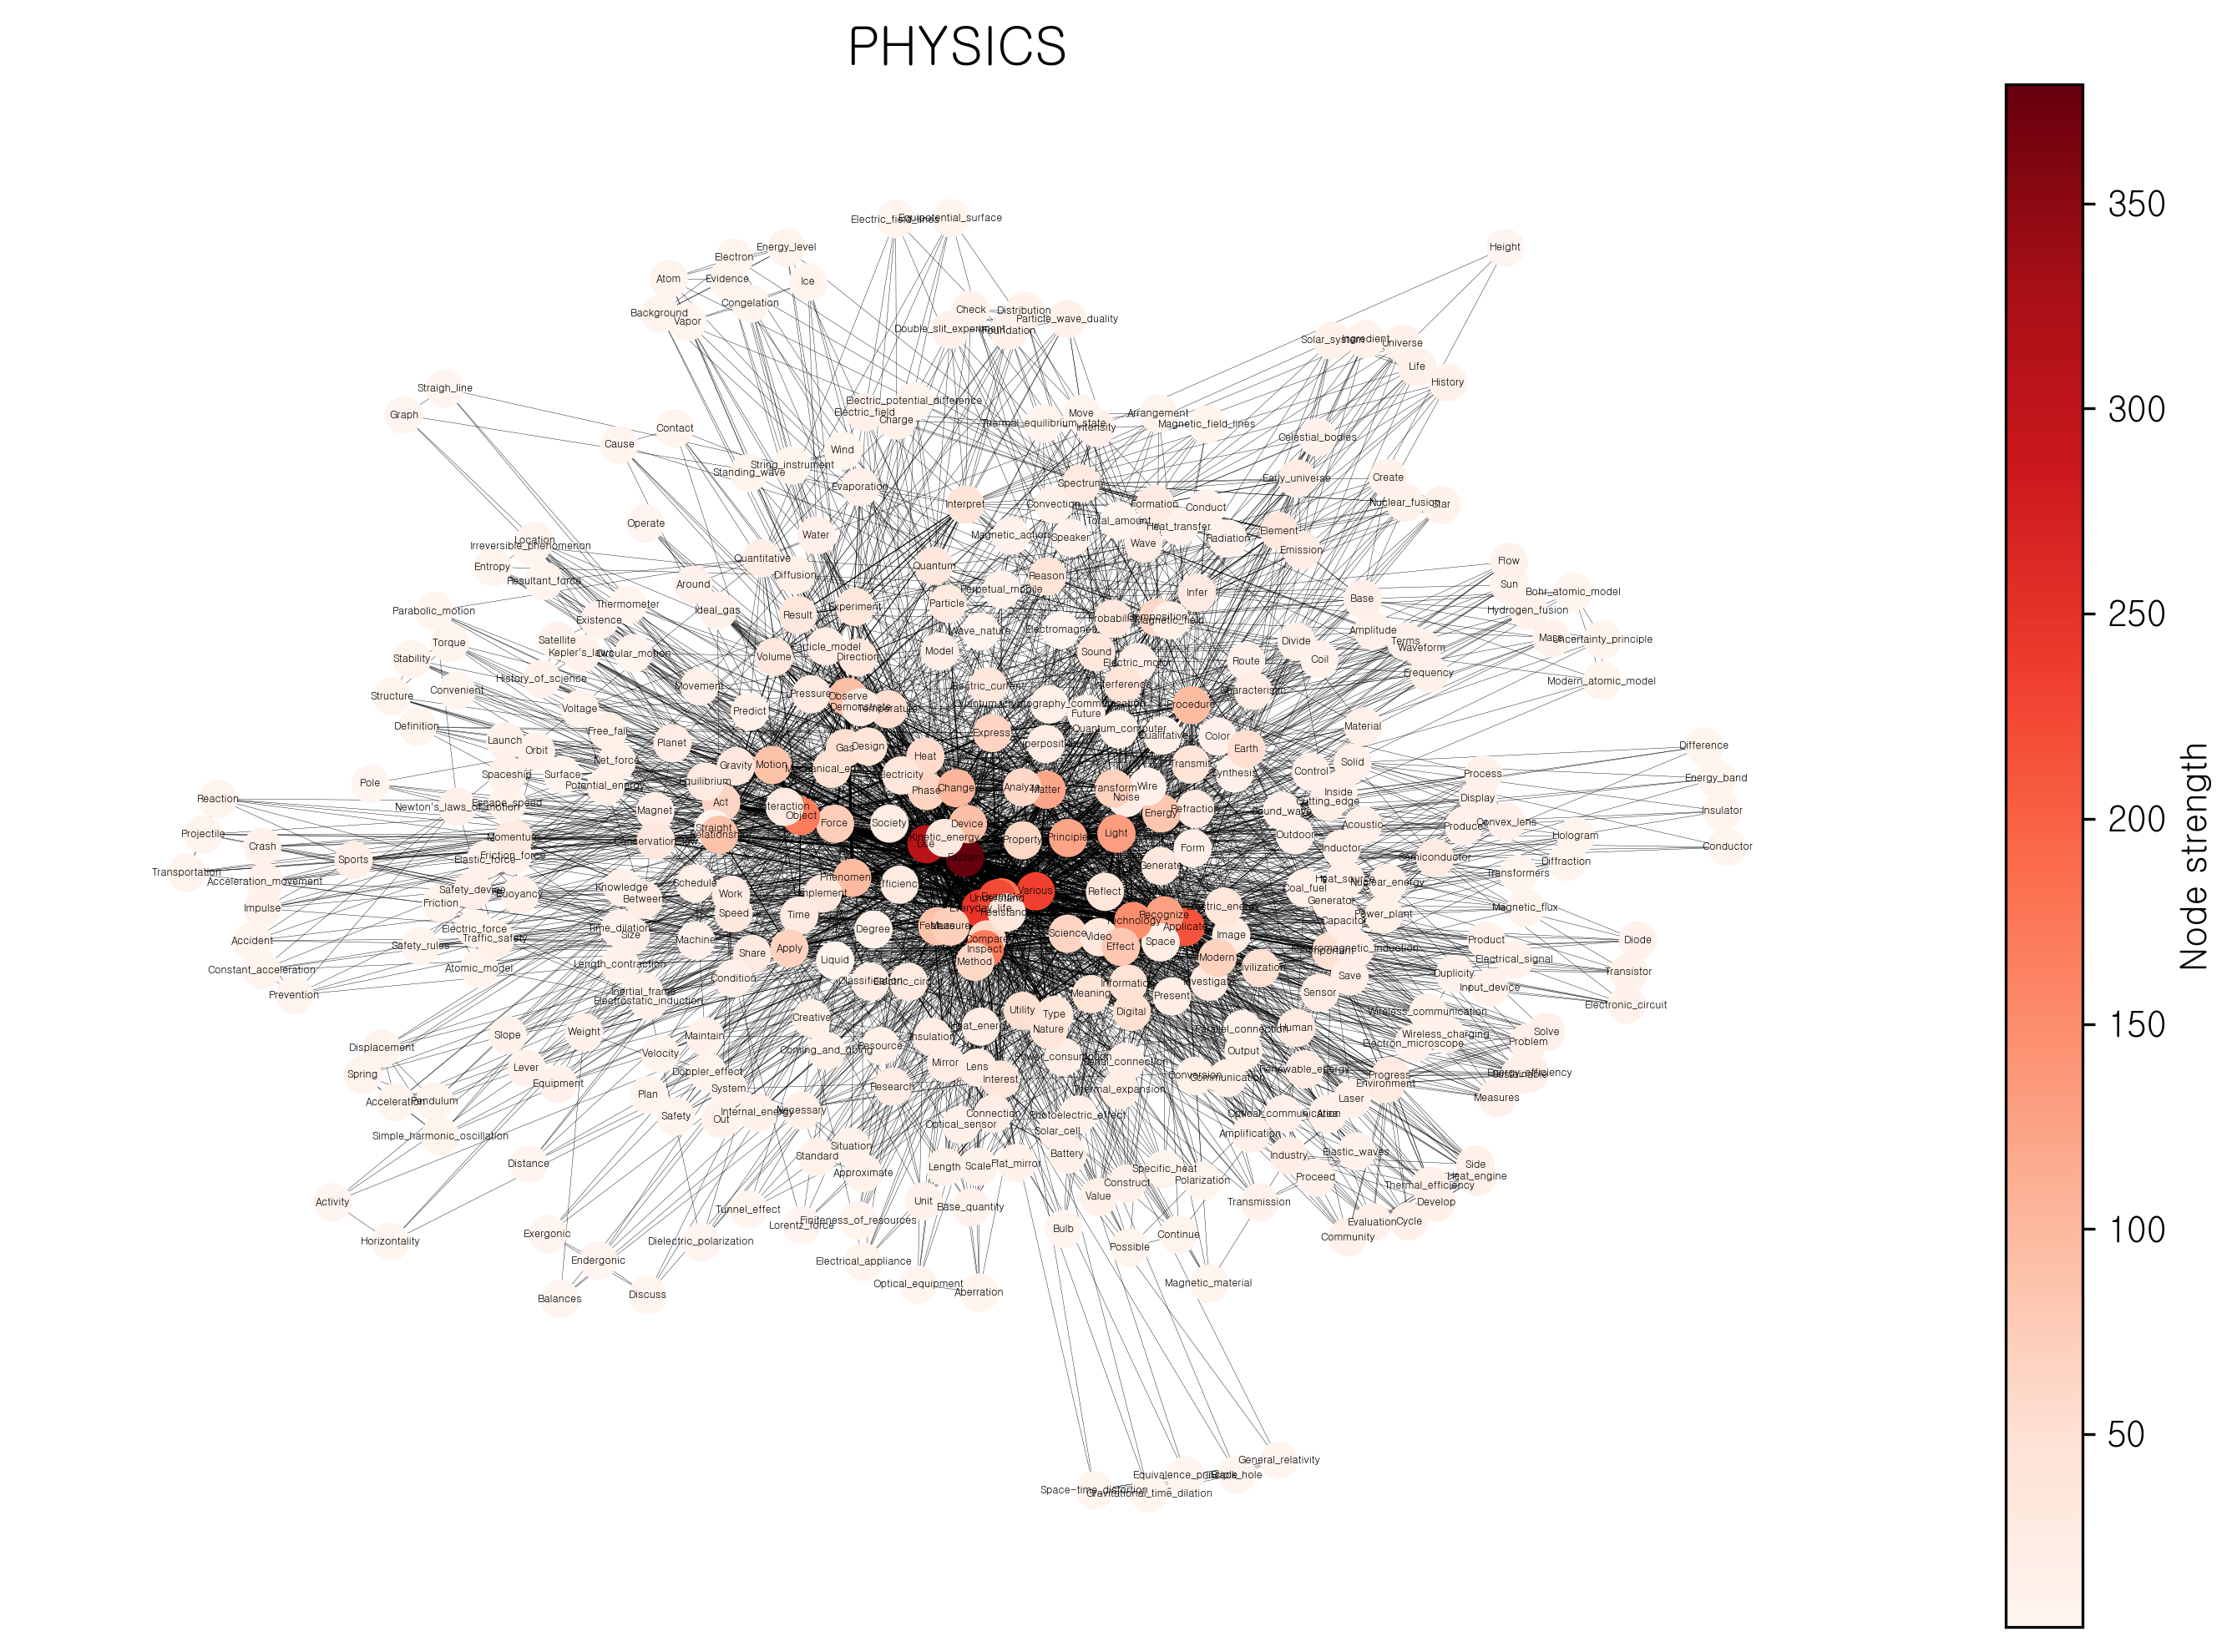

In [22]:
# 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

# 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
#node_size = [node_weights[node] * 0.1 for node in G.nodes()]
edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]

# 노드 색상 매핑을 위한 컬러맵 설정
cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

# 노드 색상 설정
node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

# 그래프 그리기
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
plt.figure(figsize=(12,8), dpi=300)
plt.title('PHYSICS', fontsize=15)
nx.draw(G, pos, with_labels=True,
        node_color=node_colors, node_size=100, width=edge_width,
        font_family = font, font_size=3)

# 컬러바
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Node strength')

plt.show()

In [19]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 389
Number of edges: 3931
WordFreq avg: 2.92, WordFreq std: 4.77
Degree avg: 20.21, Degree std: 23.73
NodeWeight avg: 25.72, NodeWeight std: 40.47
EdgeWeight avg: 1.27, EdgeWeight std: 0.89


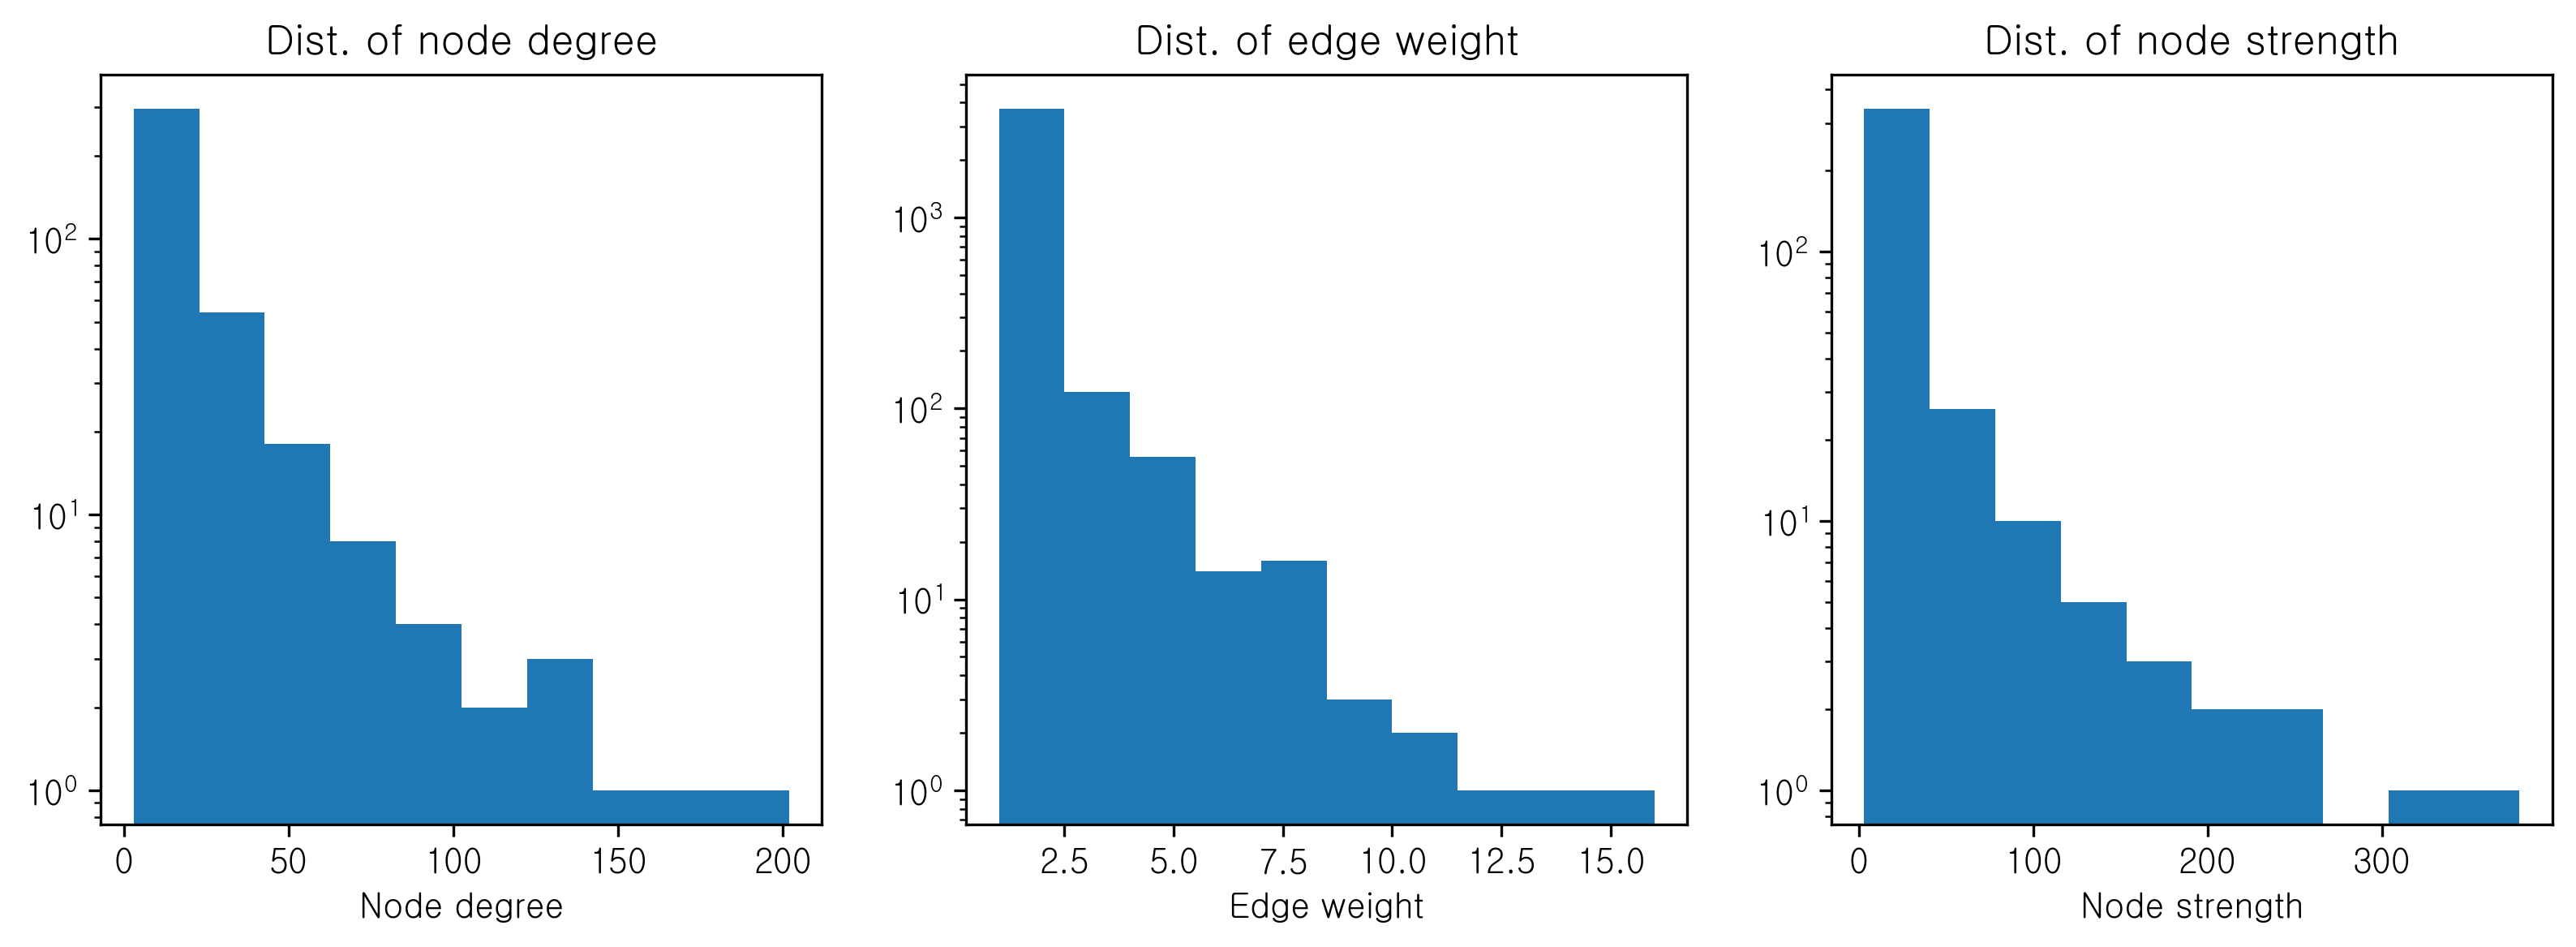

In [20]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
2: Pass, 2.6497048990159278

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
4: Pass, 7.712095487996254



Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


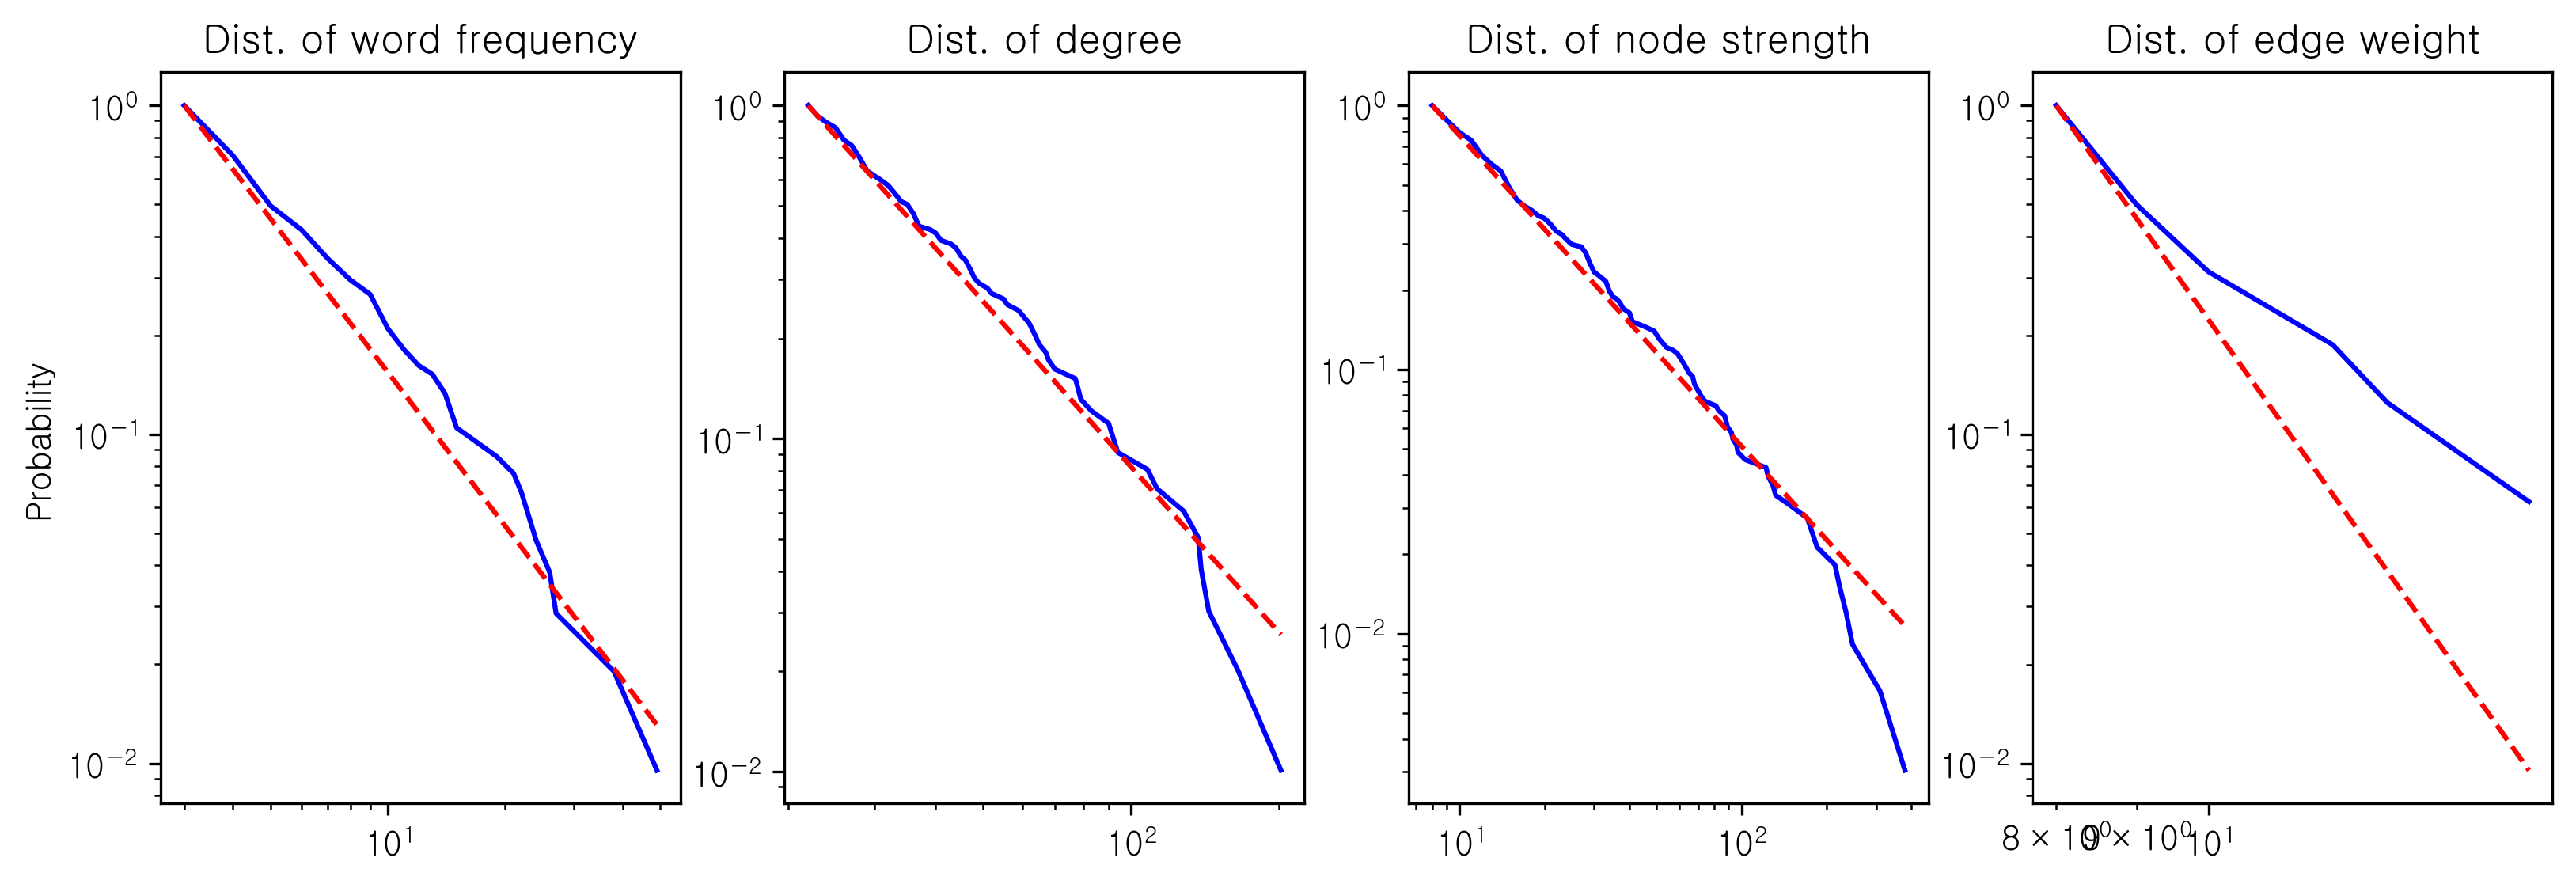

In [21]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [22]:
df = info(G)
df.head(10)

Node_F  Node Frequency        Node_ND  Node Degree        Node_NS  \
0        Explain            49.0        Explain        202.0        Explain   
1            Use            38.0            Use        165.0            Use   
2  Everyday_life            27.0  Everyday_life        144.0  Everyday_life   
3         Object            26.0     Understand        139.0        Various   
4        Various            24.0        Various        137.0     Understand   
5        Example            22.0      Applicate        128.0      Applicate   
6     Understand            22.0        Example        113.0        Example   
7      Applicate            21.0        Inspect        108.0         Object   
8        Inspect            19.0         Object         94.0        Inspect   
9         Matter            15.0      Principle         90.0     Technology   

   Node Strength                      Edge  Edge Weight        Node_BC  \
0          379.0            (Use, Explain)           16        Explain   
1          309.0      (Everyday_life, Use)           13            Use   
2          247.0        (Various, Explain)           12     Understand   
3          234.0            (Use, Inspect)           10  Everyday_life   
4          222.0             (Use, Device)           10        Various   
5          214.0     (Phenomenon, Explain)            9      Applicate   
6          185.0             (Object, Use)            9         Object   
7          171.0     (Explain, Understand)            9        Example   
8          171.0     (Observe, Phenomenon)            8        Inspect   
9          150.0  (Everyday_life, Inspect)            8      Principle   

   Betweenness Centrality  
0                0.157062  
1                0.117353  
2                0.097690  
3                0.086937  
4                0.084668  
5                0.077696  
6                0.070829  
7                0.063079  
8                0.060435  
9                0.056064

# 초3-6

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


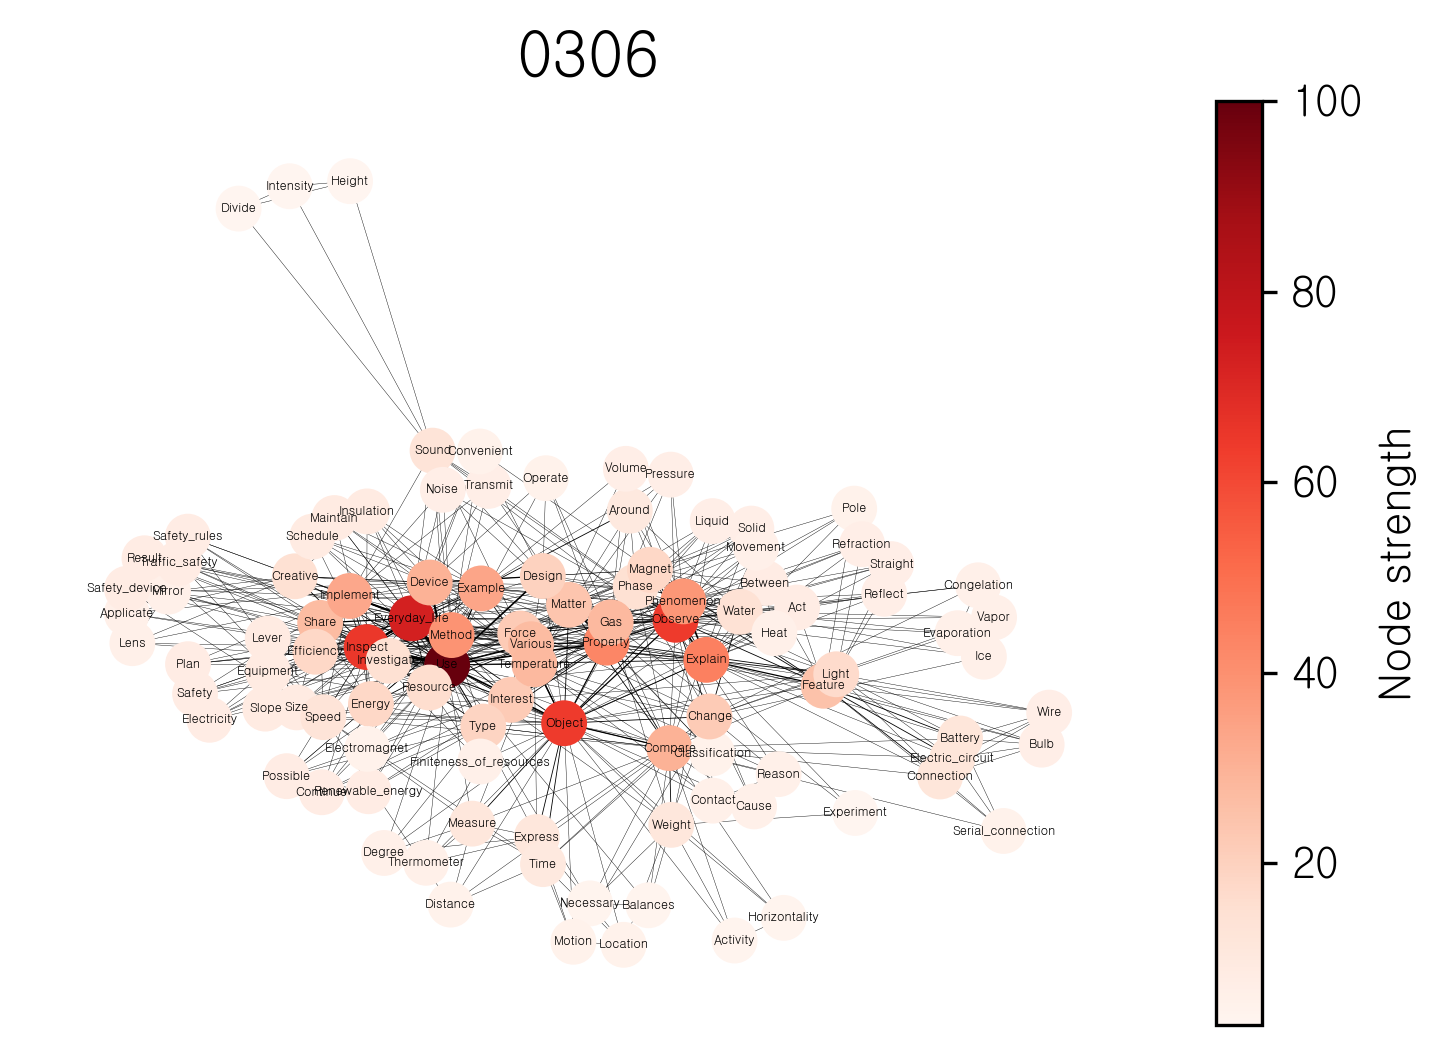

In [23]:
subject_graph(2, file_lst[0], '0306')

In [24]:
G = graph(2, file_lst[0])

In [25]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 637
WordFreq avg: 2.4, WordFreq std: 2.58
Degree avg: 12.13, Degree std: 10.06
NodeWeight avg: 15.07, NodeWeight std: 16.24
EdgeWeight avg: 1.24, EdgeWeight std: 0.69


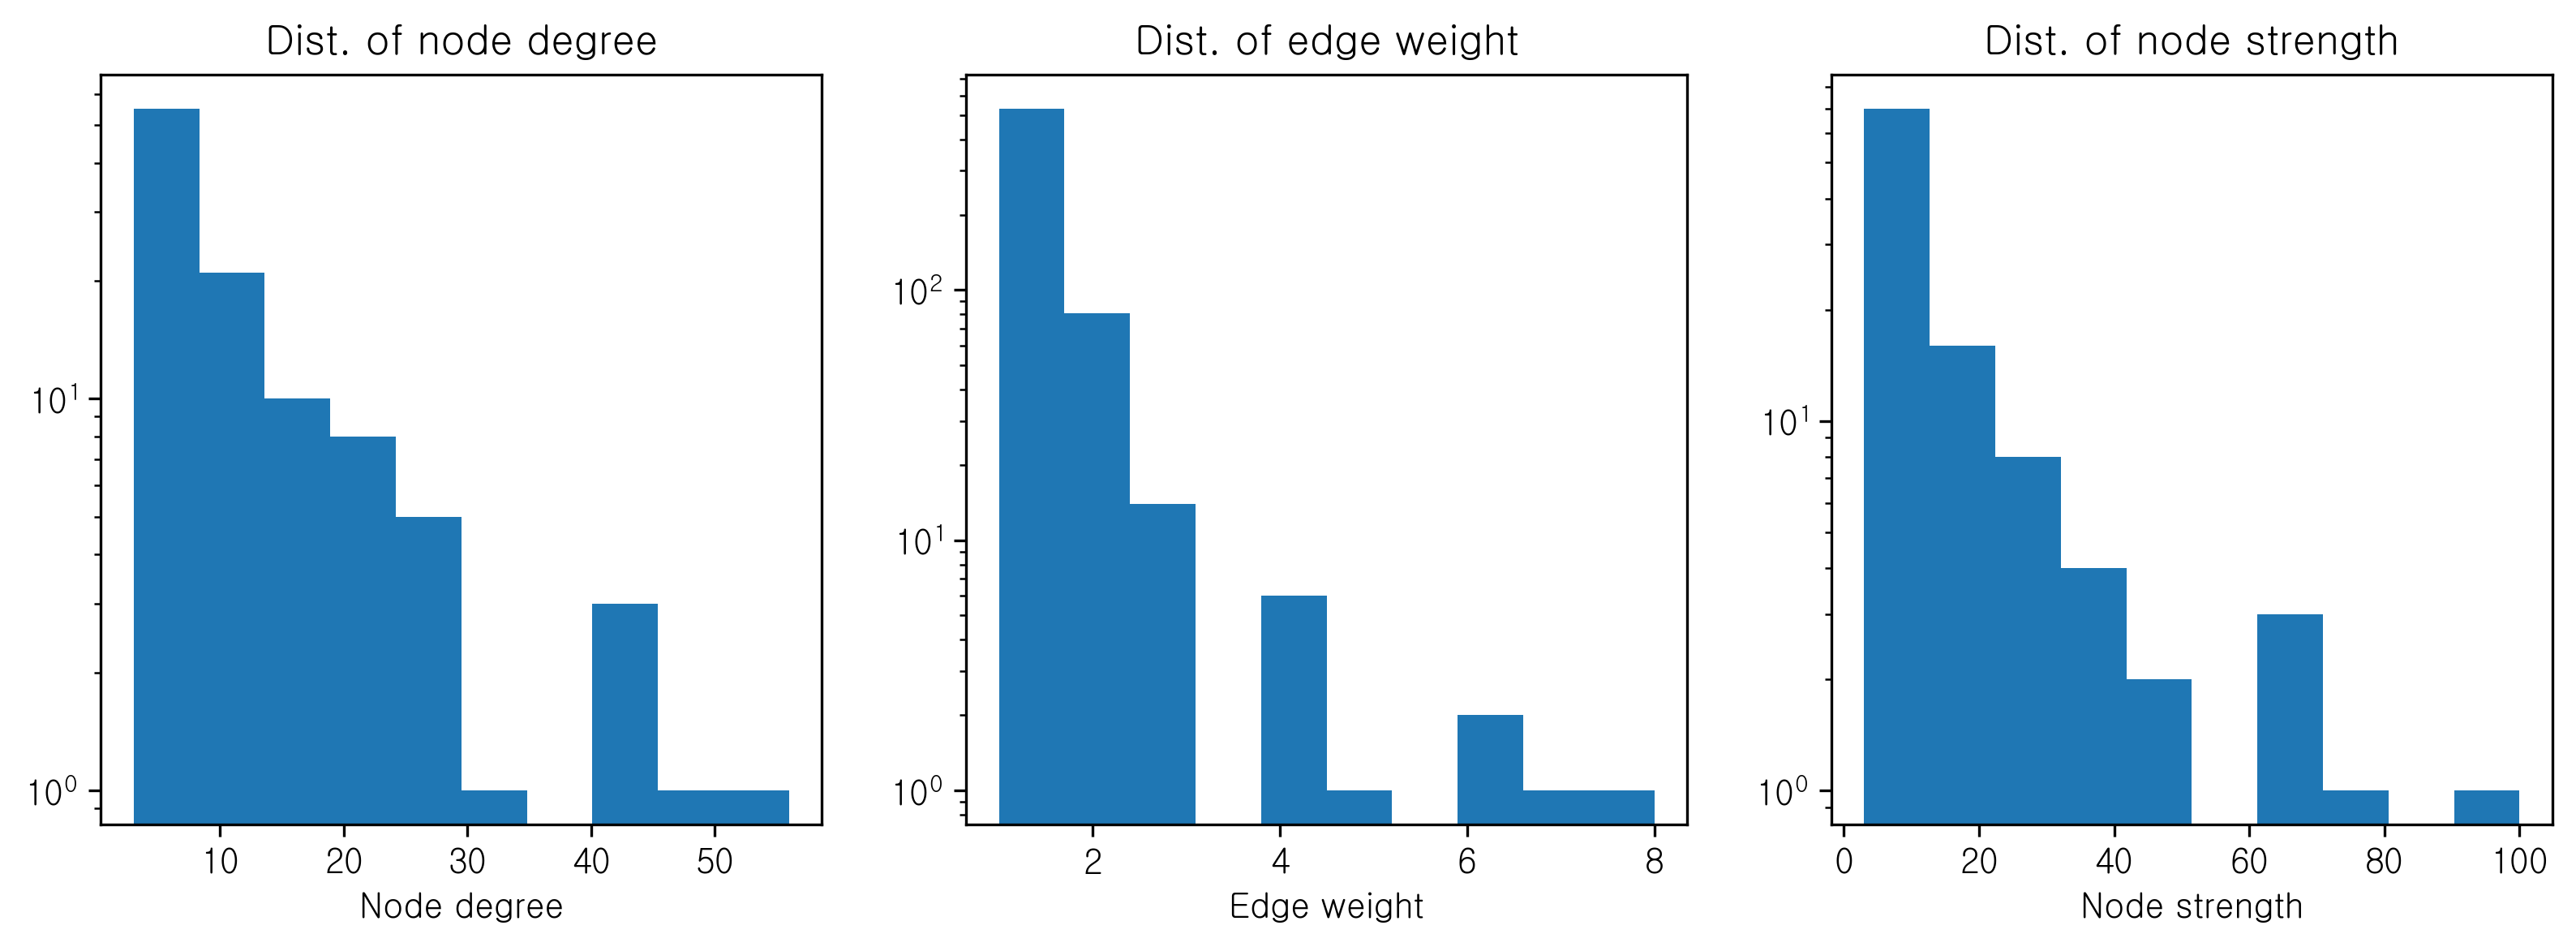

In [26]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
1: Pass, 3.1038545890335403

Calculating best minimal value for power law fit
2: Pass, 2.6028808305369857



Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


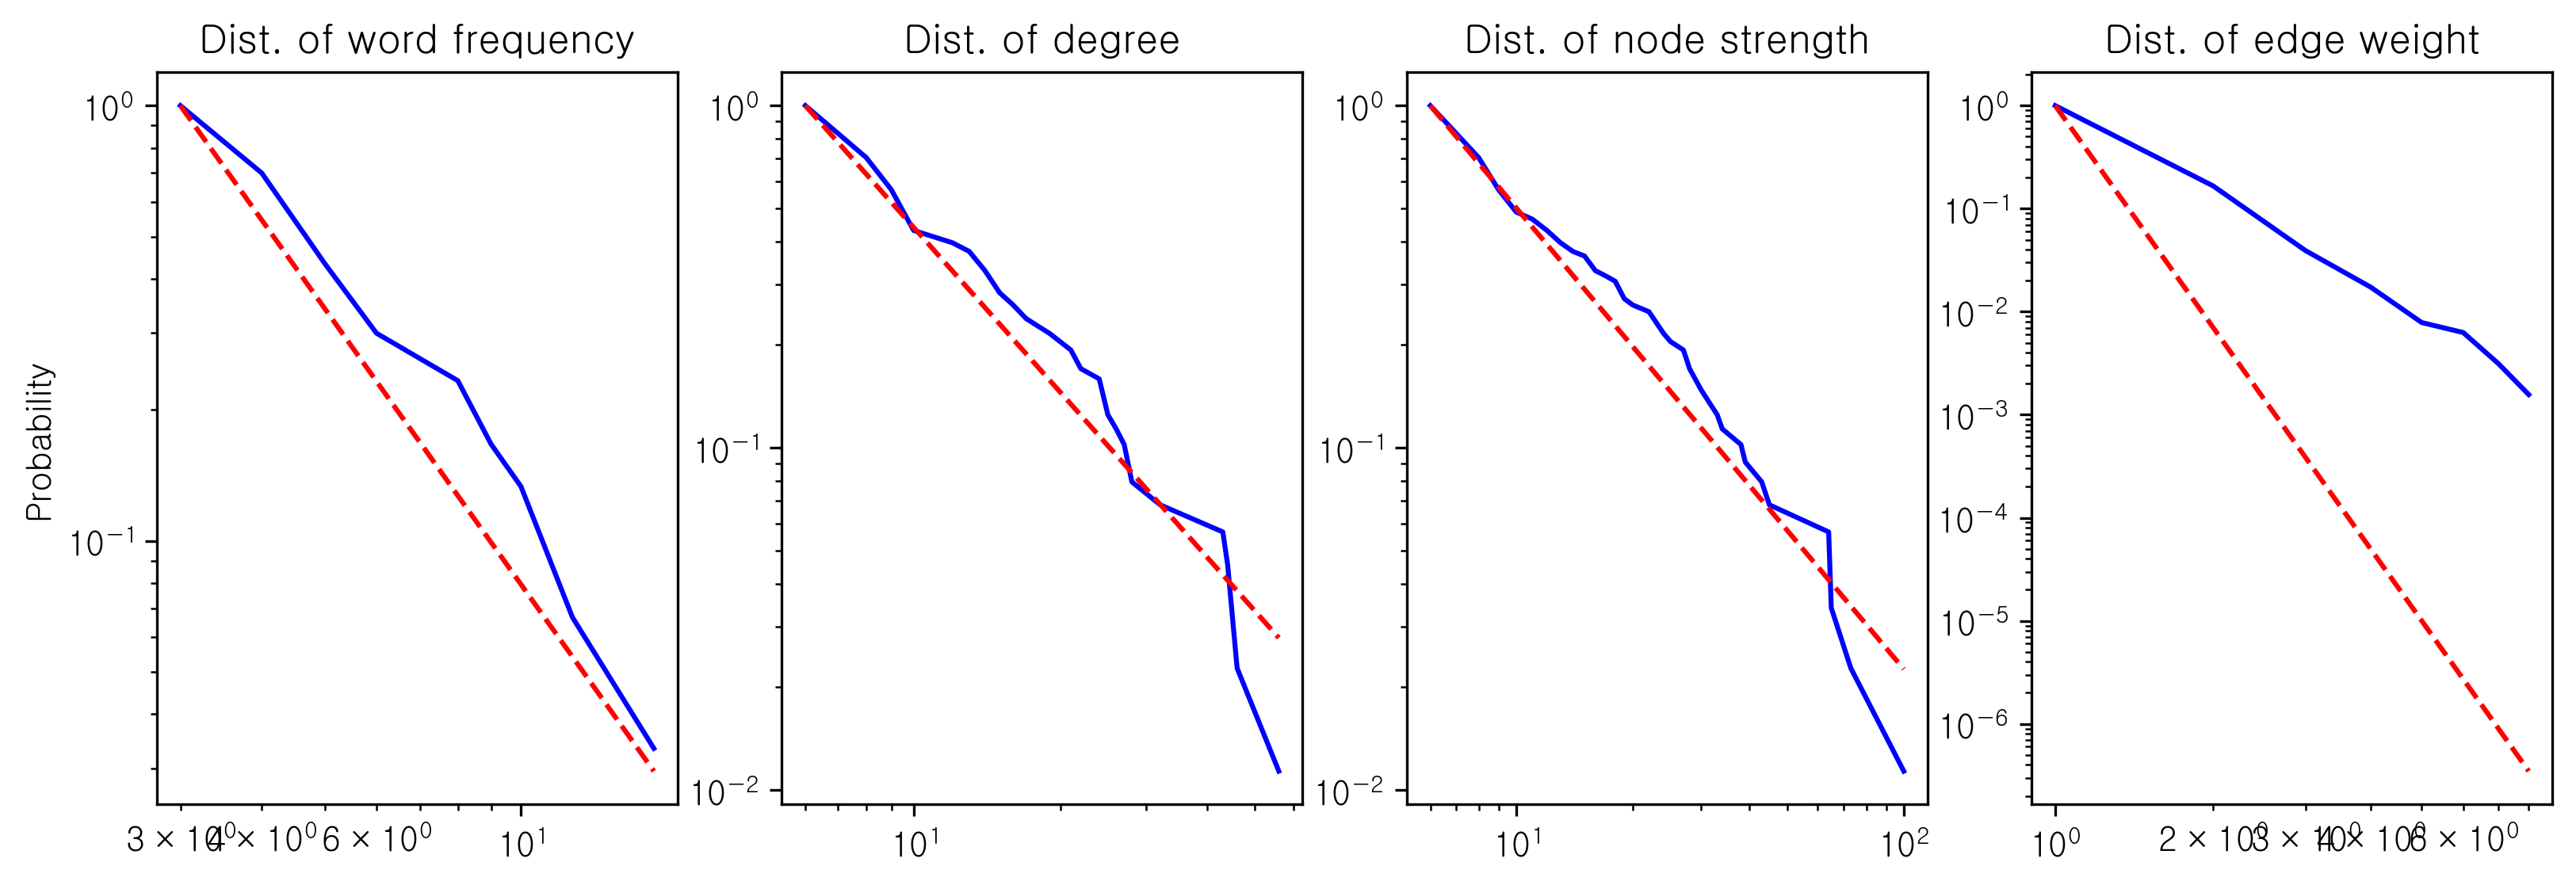

In [27]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [28]:
df = info(G)
df.head(20)

Node_F  Node Frequency        Node_ND  Node Degree        Node_NS  \
0             Use            16.0            Use         56.0            Use   
1          Object            12.0  Everyday_life         46.0  Everyday_life   
2         Observe            10.0        Observe         44.0        Inspect   
3   Everyday_life            10.0        Inspect         44.0        Observe   
4         Inspect             9.0         Object         43.0         Object   
5        Property             8.0        Explain         32.0        Explain   
6         Explain             8.0         Method         28.0       Property   
7      Phenomenon             6.0       Property         27.0         Method   
8         Compare             6.0        Example         27.0     Phenomenon   
9             Gas             5.0     Phenomenon         26.0        Example   
10         Method             5.0        Compare         25.0      Implement   
11         Device             5.0            Gas         24.0        Compare   
12        Example             5.0      Implement         24.0         Device   
13       Interest             4.0    Temperature         24.0            Gas   
14         Matter             4.0          Share         22.0    Temperature   
15        Various             4.0        Various         21.0          Share   
16         Design             4.0         Device         21.0        Various   
17      Implement             4.0         Matter         19.0        Feature   
18        Feature             4.0         Change         19.0         Matter   
19         Change             4.0          Force         17.0       Interest   

    Node Strength                        Edge  Edge Weight        Node_BC  \
0           100.0              (Use, Inspect)            8            Use   
1            73.0        (Everyday_life, Use)            7         Object   
2            65.0       (Observe, Phenomenon)            6        Observe   
3            64.0    (Everyday_life, Inspect)            6  Everyday_life   
4            64.0               (Use, Device)            5        Inspect   
5            45.0          (Observe, Explain)            4        Explain   
6            43.0       (Phenomenon, Explain)            4        Compare   
7            39.0  (Everyday_life, Implement)            4       Property   
8            38.0               (Object, Use)            4     Phenomenon   
9            34.0             (Use, Property)            4         Method   
10           33.0               (Use, Design)            4         Change   
11           30.0           (Observe, Object)            3    Temperature   
12           30.0      (Everyday_life, Share)            3          Sound   
13           28.0     (Everyday_life, Method)            3        Example   
14           28.0             (Force, Object)            3      Implement   
15           27.0           (Object, Compare)            3         Device   
16           27.0          (Object, Property)            3        Feature   
17           25.0              (Use, Various)            3            Gas   
18           24.0              (Use, Example)            3         Matter   
19           22.0               (Use, Method)            3          Share   

    Betweenness Centrality  
0                 0.217404  
1                 0.185977  
2                 0.180783  
3                 0.140524  
4                 0.131860  
5                 0.123765  
6                 0.109377  
7                 0.092532  
8                 0.082280  
9                 0.080676  
10                0.077649  
11                0.077290  
12                0.074272  
13                0.070495  
14                0.067423  
15                0.066295  
16                0.065910  
17                0.064836  
18                0.054934  
19                0.050951

# 중1-3

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


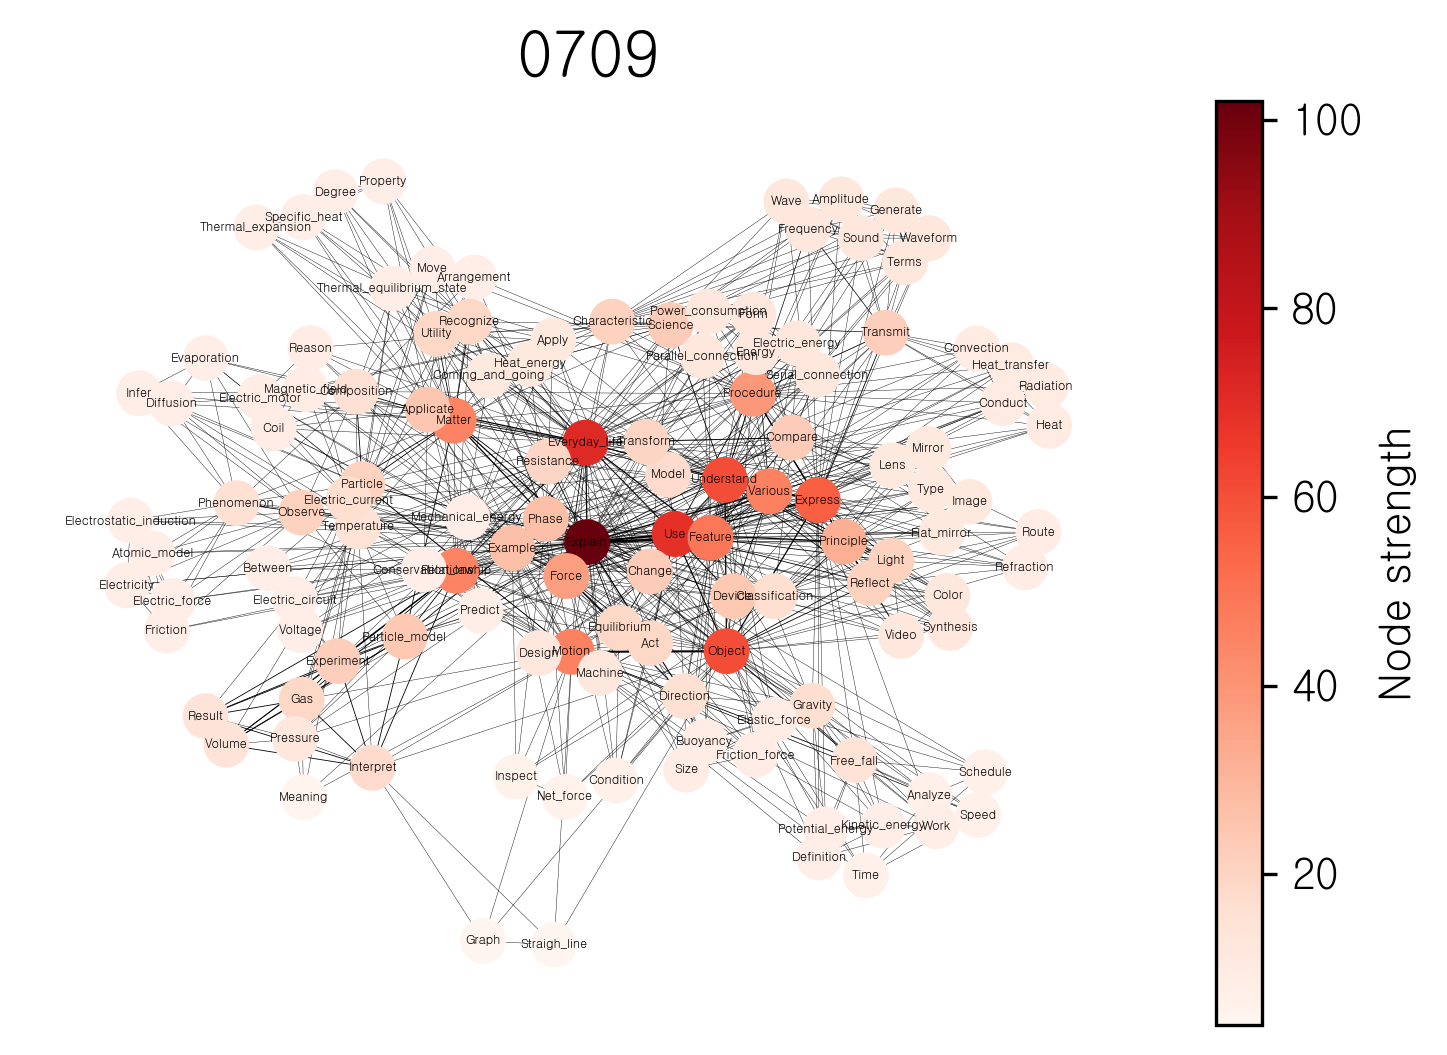

In [29]:
subject_graph(2, file_lst[1], '0709')

In [30]:
G = graph(2, file_lst[1])

In [31]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 125
Number of edges: 933
WordFreq avg: 1.94, WordFreq std: 1.75
Degree avg: 14.93, Degree std: 10.98
NodeWeight avg: 17.18, NodeWeight std: 15.28
EdgeWeight avg: 1.15, EdgeWeight std: 0.45


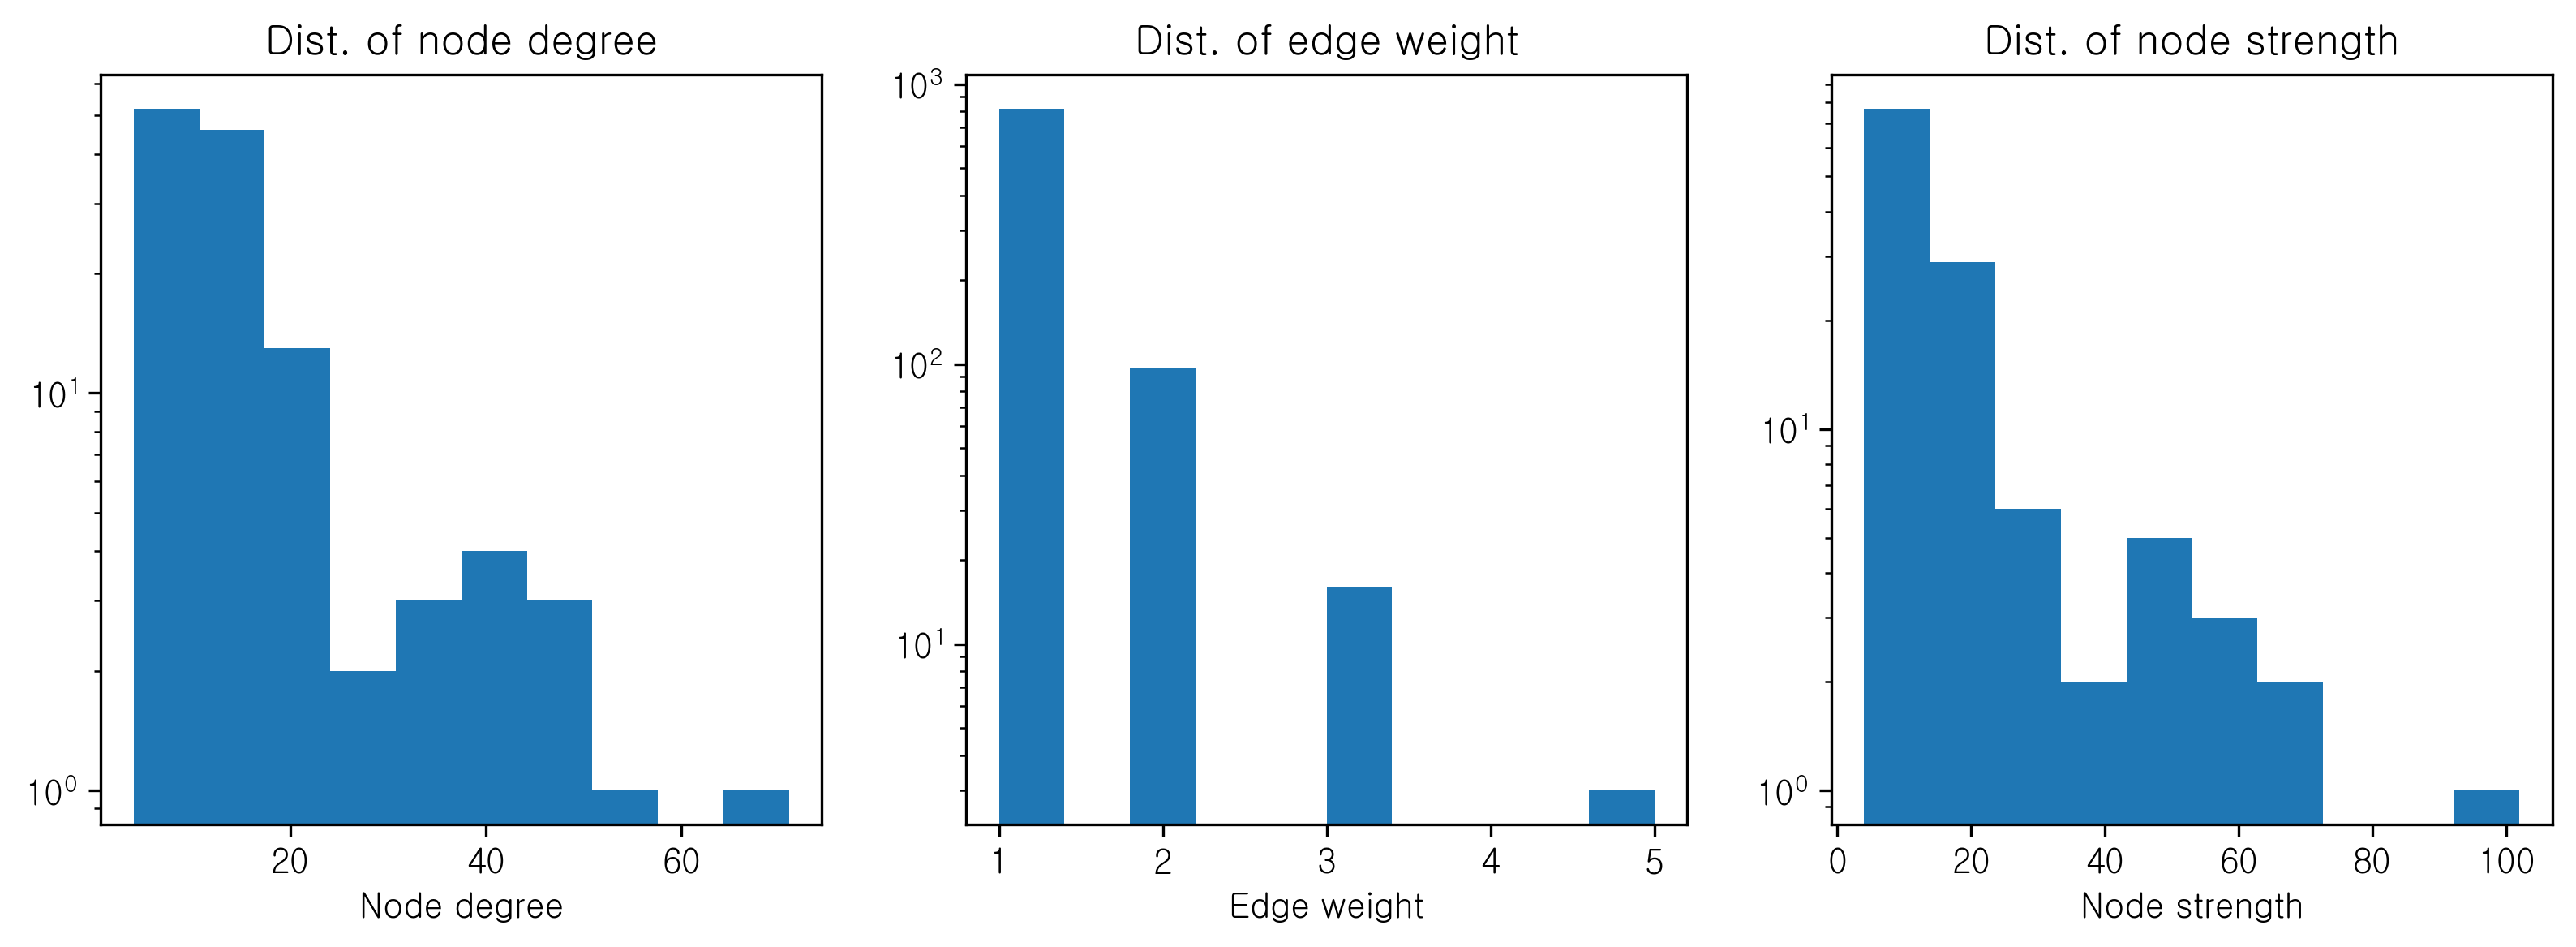

In [32]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


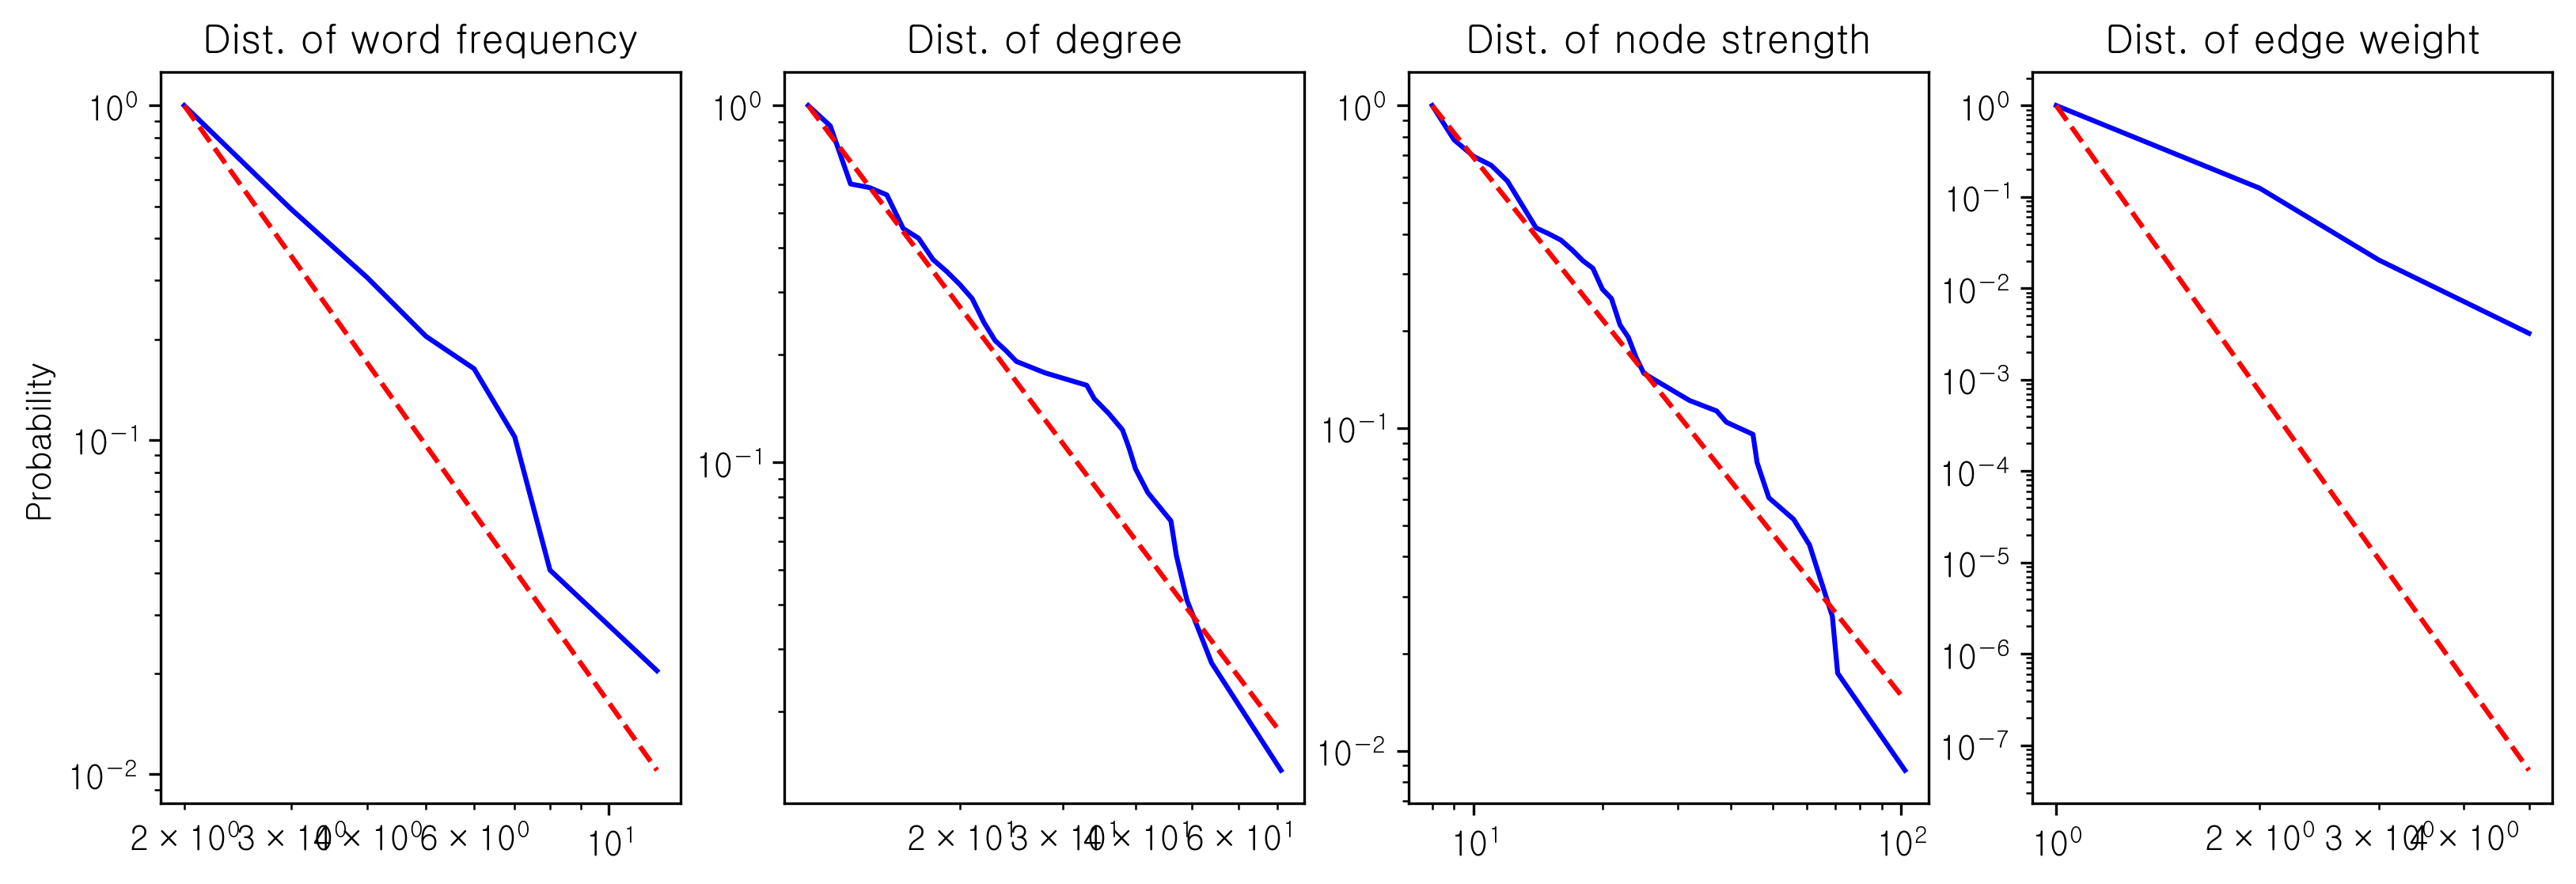

In [33]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [34]:
df = info(G)
df.head(20)

Node_F  Node Frequency        Node_ND  Node Degree  \
0          Explain            12.0        Explain         71.0   
1           Object             8.0  Everyday_life         54.0   
2              Use             7.0     Understand         49.0   
3    Everyday_life             7.0            Use         47.0   
4           Motion             7.0         Object         46.0   
5           Matter             6.0        Express         42.0   
6          Express             6.0         Motion         40.0   
7       Understand             6.0        Feature         39.0   
8          Feature             5.0        Various         38.0   
9     Relationship             5.0   Relationship         36.0   
10       Procedure             4.0      Procedure         34.0   
11         Various             4.0         Matter         33.0   
12  Particle_model             4.0          Force         28.0   
13           Phase             4.0        Example         25.0   
14           Force             4.0      Principle         24.0   
15        Particle             3.0      Applicate         23.0   
16       Applicate             3.0          Phase         22.0   
17         Observe             3.0        Science         22.0   
18          Change             3.0         Change         21.0   
19         Example             3.0         Device         21.0   

           Node_NS  Node Strength                        Edge  Edge Weight  \
0          Explain          102.0          (Explain, Feature)            5   
1    Everyday_life           71.0              (Explain, Use)            5   
2              Use           69.0            (Motion, Object)            5   
3       Understand           61.0           (Explain, Matter)            3   
4           Object           61.0            (Explain, Force)            3   
5          Express           56.0    (Explain, Everyday_life)            3   
6          Feature           49.0          (Explain, Various)            3   
7          Various           46.0             (Matter, Phase)            3   
8           Motion           46.0        (Procedure, Express)            3   
9           Matter           45.0              (Express, Use)            3   
10    Relationship           45.0       (Express, Understand)            3   
11       Procedure           39.0           (Express, Object)            3   
12           Force           37.0              (Use, Various)            3   
13       Principle           32.0               (Use, Object)            3   
14           Phase           27.0            (Use, Principle)            3   
15         Example           27.0  (Everyday_life, Applicate)            3   
16       Applicate           25.0    (Everyday_life, Feature)            3   
17  Particle_model           24.0        (Understand, Object)            3   
18          Device           24.0  (Relationship, Experiment)            3   
19          Change           23.0     (Composition, Particle)            2   

          Node_BC  Betweenness Centrality  
0         Explain                0.203593  
1   Everyday_life                0.137948  
2          Object                0.131425  
3             Use                0.127234  
4          Motion                0.124501  
5      Understand                0.117064  
6         Express                0.109710  
7          Matter                0.098252  
8    Relationship                0.092026  
9       Procedure                0.083015  
10        Feature                0.079824  
11        Various                0.077358  
12          Force                0.062167  
13      Applicate                0.054495  
14         Change                0.050204  
15        Example                0.047738  
16          Phase                0.047225  
17        Observe                0.046459  
18      Principle                0.045755  
19       Particle                0.045290

# 통합과학

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


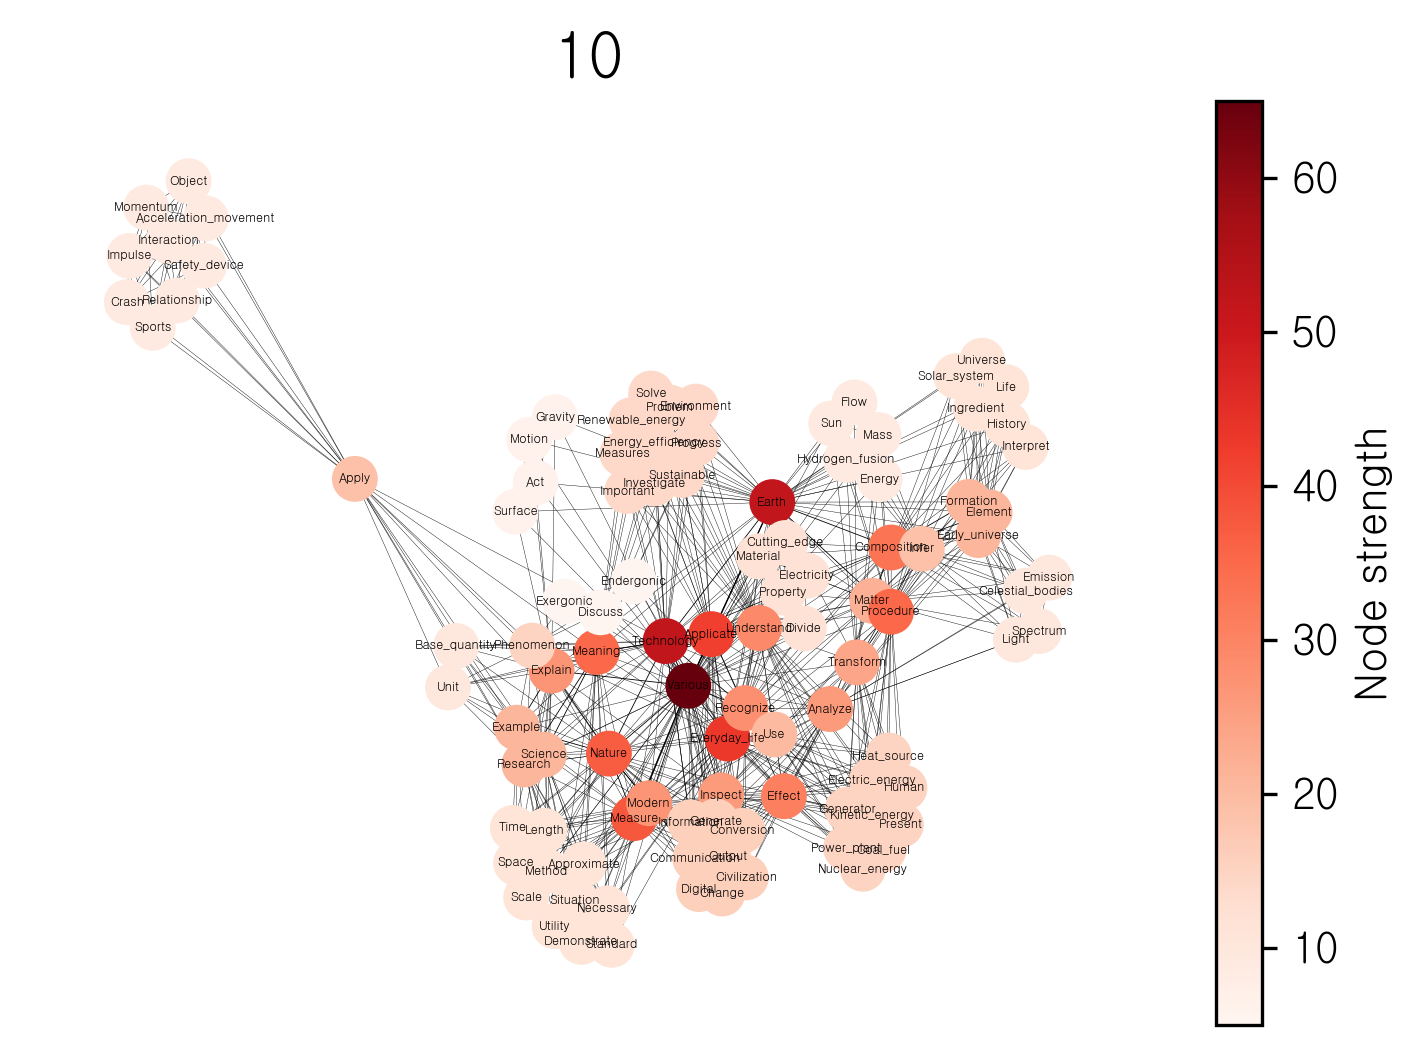

In [35]:
subject_graph(2, file_lst[2], '10')

In [36]:
G = graph(2, file_lst[2])

In [37]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 834
WordFreq avg: 1.45, WordFreq std: 0.89
Degree avg: 15.89, Degree std: 9.08
NodeWeight avg: 16.63, NodeWeight std: 10.59
EdgeWeight avg: 1.05, EdgeWeight std: 0.23


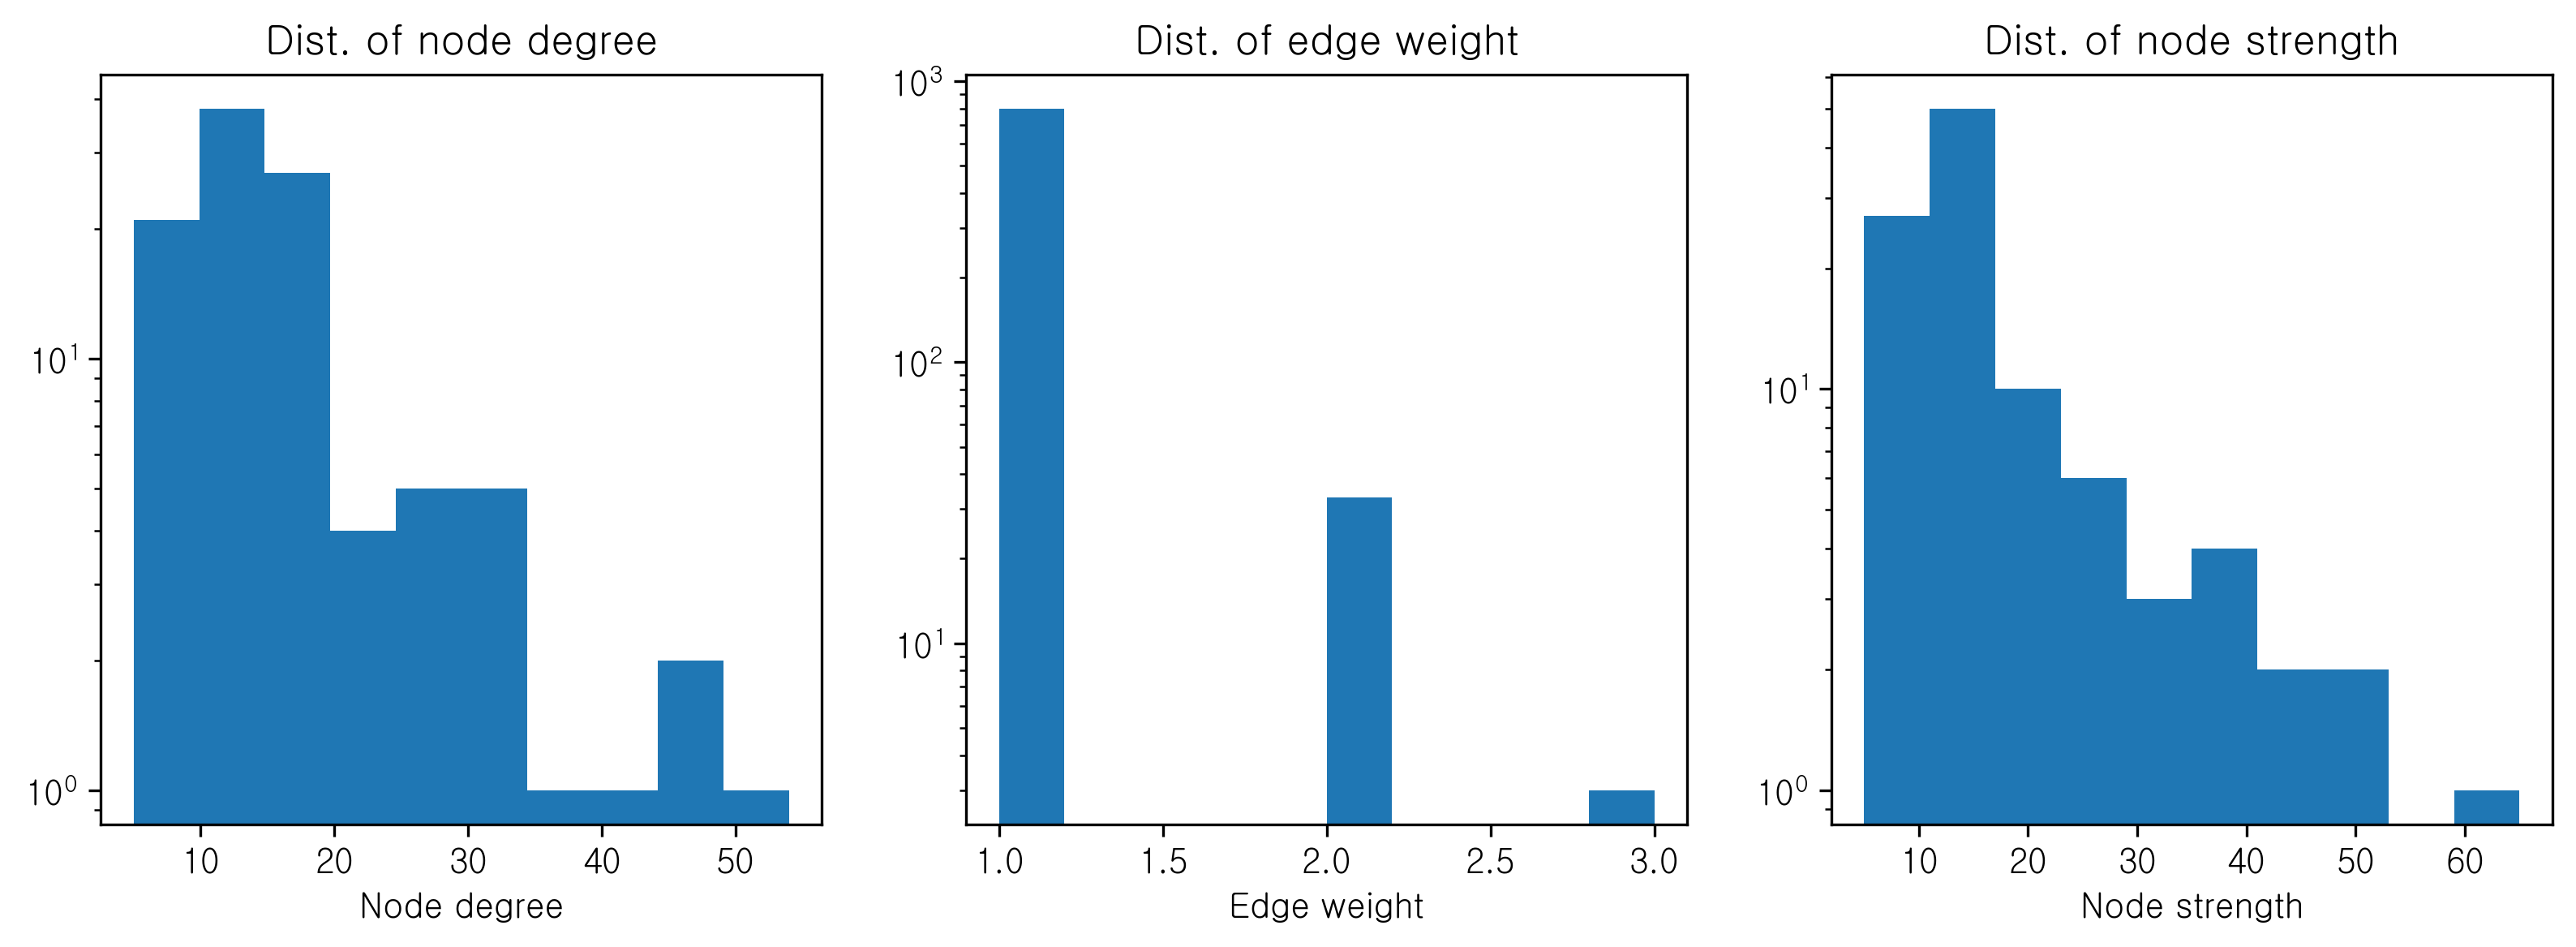

In [38]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
1: Pass, 7.182078107669997

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


Calculating best minimal value for power law fit


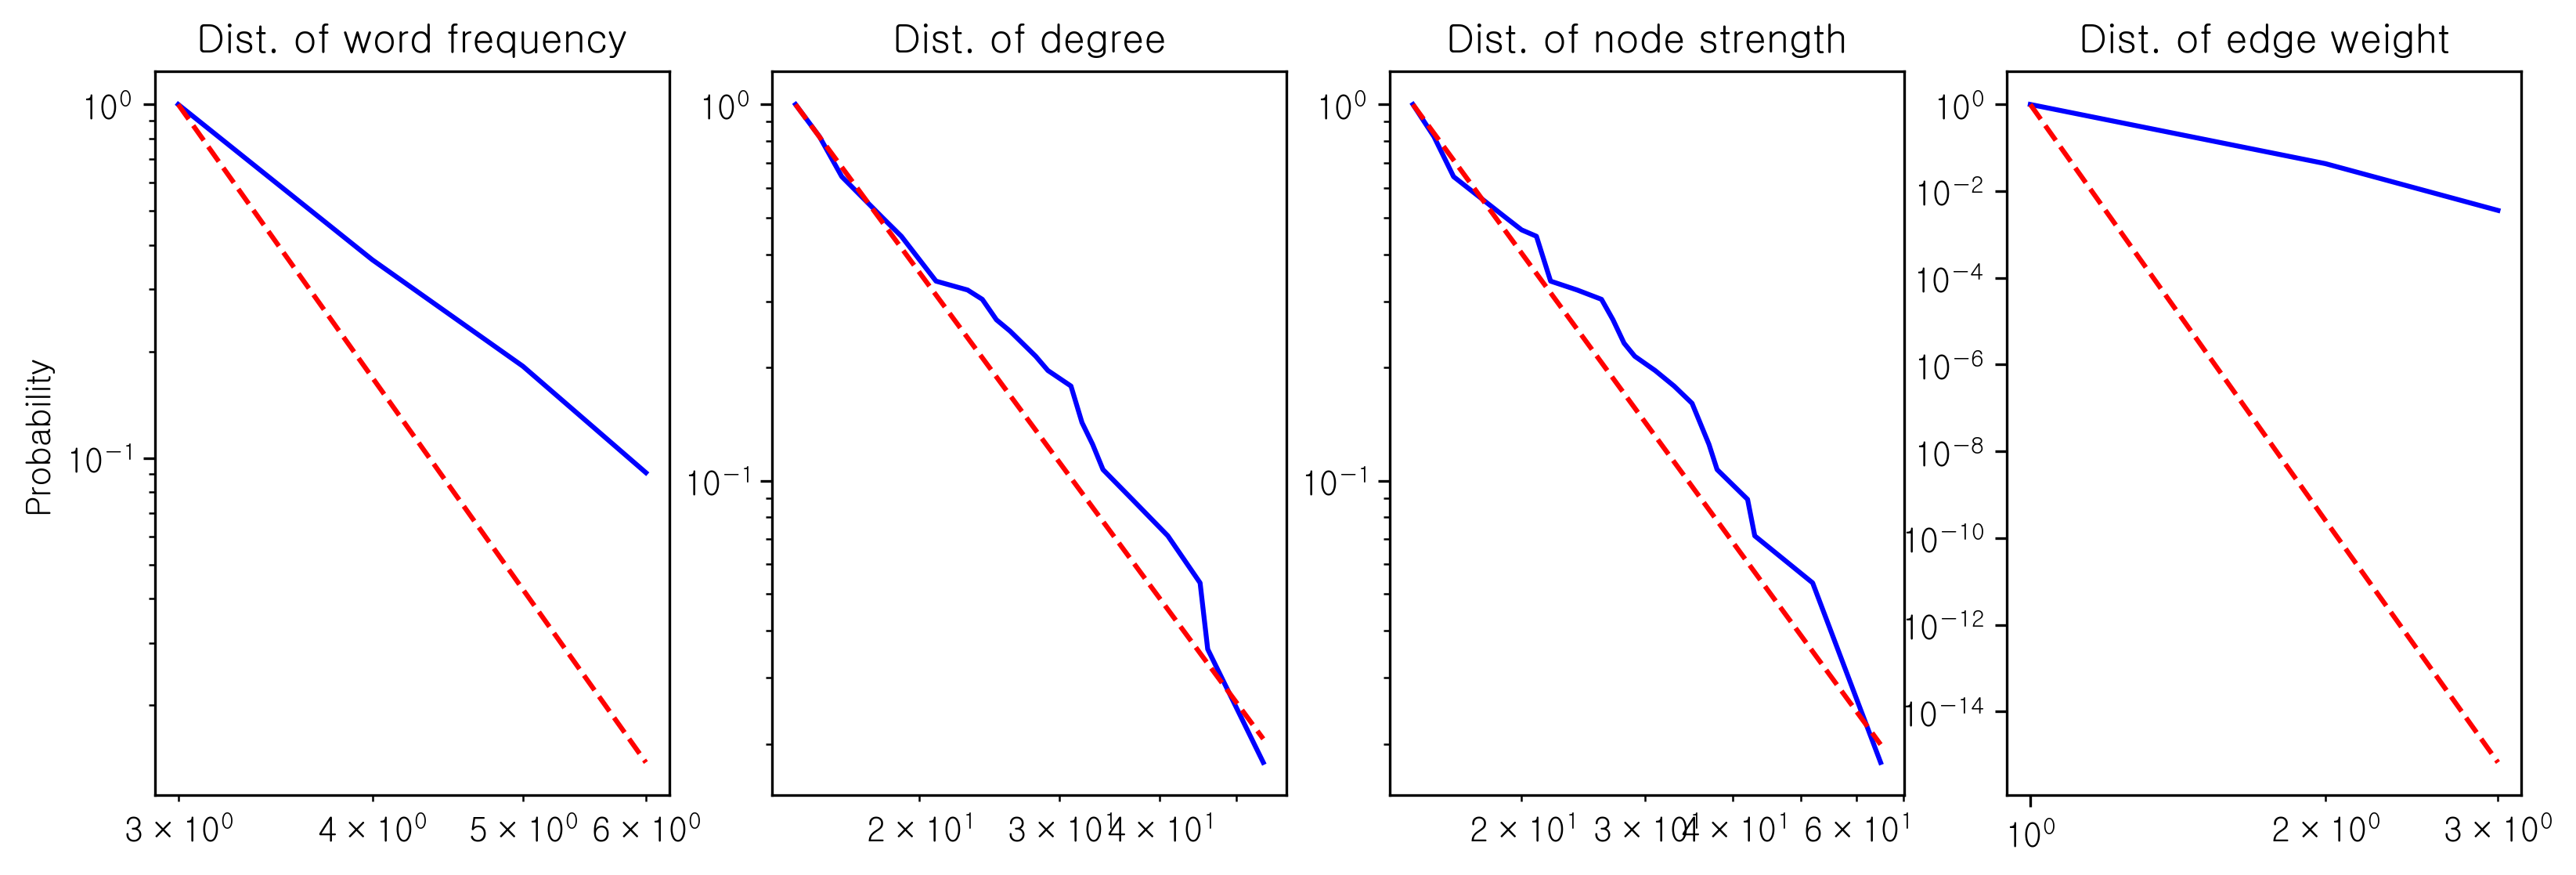

In [39]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [40]:
df = info(G)
df.head(20)

Node_F  Node Frequency        Node_ND  Node Degree        Node_NS  \
0         Various             6.0        Various         54.0        Various   
1           Earth             5.0          Earth         46.0     Technology   
2      Technology             4.0     Technology         45.0          Earth   
3   Everyday_life             4.0  Everyday_life         41.0  Everyday_life   
4         Measure             3.0      Applicate         37.0      Applicate   
5         Explain             3.0        Measure         34.0        Measure   
6          Nature             3.0      Procedure         33.0         Nature   
7         Meaning             3.0        Meaning         32.0        Meaning   
8       Applicate             3.0         Nature         31.0      Procedure   
9     Composition             3.0         Effect         31.0    Composition   
10      Procedure             3.0     Understand         29.0         Effect   
11        Example             2.0    Composition         28.0     Understand   
12        Inspect             2.0        Inspect         26.0      Recognize   
13         Modern             2.0        Analyze         26.0        Explain   
14     Phenomenon             2.0      Recognize         25.0         Modern   
15          Apply             2.0        Explain         24.0        Inspect   
16       Research             2.0         Modern         24.0        Analyze   
17        Science             2.0      Transform         23.0      Transform   
18        Analyze             2.0         Matter         21.0         Matter   
19         Effect             2.0        Example         19.0        Example   

    Node Strength                      Edge  Edge Weight        Node_BC  \
0            65.0        (Measure, Various)            3        Various   
1            52.0          (Various, Earth)            3          Apply   
2            52.0   (Technology, Applicate)            3          Earth   
3            43.0         (Measure, Nature)            2     Technology   
4            42.0         (Measure, Modern)            2  Everyday_life   
5            38.0        (Explain, Example)            2      Procedure   
6            37.0         (Explain, Nature)            2        Meaning   
7            35.0        (Explain, Various)            2      Applicate   
8            35.0         (Example, Nature)            2         Nature   
9            33.0         (Nature, Various)            2        Explain   
10           31.0          (Nature, Modern)            2        Measure   
11           29.0      (Nature, Technology)            2    Composition   
12           28.0         (Various, Modern)            2     Understand   
13           27.0  (Various, Everyday_life)            2         Effect   
14           27.0     (Various, Technology)            2        Analyze   
15           26.0      (Various, Applicate)            2        Inspect   
16           26.0      (Various, Recognize)            2      Transform   
17           24.0     (Technology, Meaning)            2     Phenomenon   
18           22.0   (Technology, Recognize)            2        Example   
19           21.0       (Technology, Earth)            2        Science   

    Betweenness Centrality  
0                 0.178566  
1                 0.174896  
2                 0.170978  
3                 0.139082  
4                 0.135013  
5                 0.109882  
6                 0.106438  
7                 0.094342  
8                 0.090540  
9                 0.085448  
10                0.083755  
11                0.080416  
12                0.077222  
13                0.073442  
14                0.072762  
15                0.069208  
16                0.059695  
17                0.058557  
18                0.055008  
19                0.053681

# 물리학

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


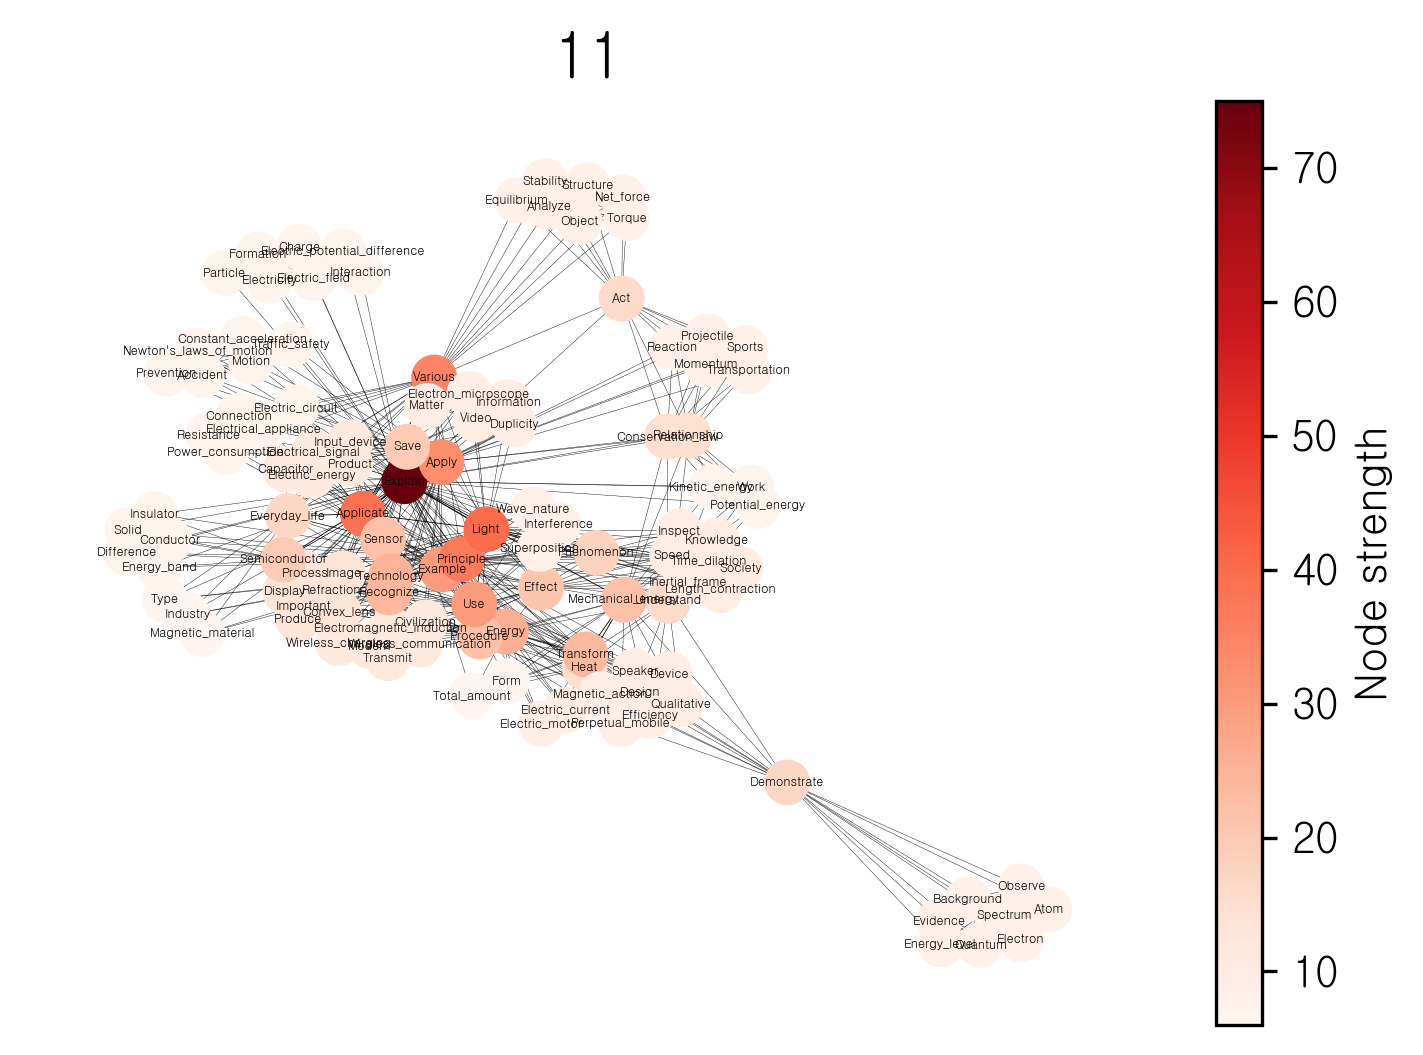

In [41]:
subject_graph(2, file_lst[3], '11')

In [42]:
G = graph(2, file_lst[3])

In [43]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 119
Number of edges: 715
WordFreq avg: 1.42, WordFreq std: 1.05
Degree avg: 12.02, Degree std: 8.27
NodeWeight avg: 12.42, NodeWeight std: 9.34
EdgeWeight avg: 1.03, EdgeWeight std: 0.2


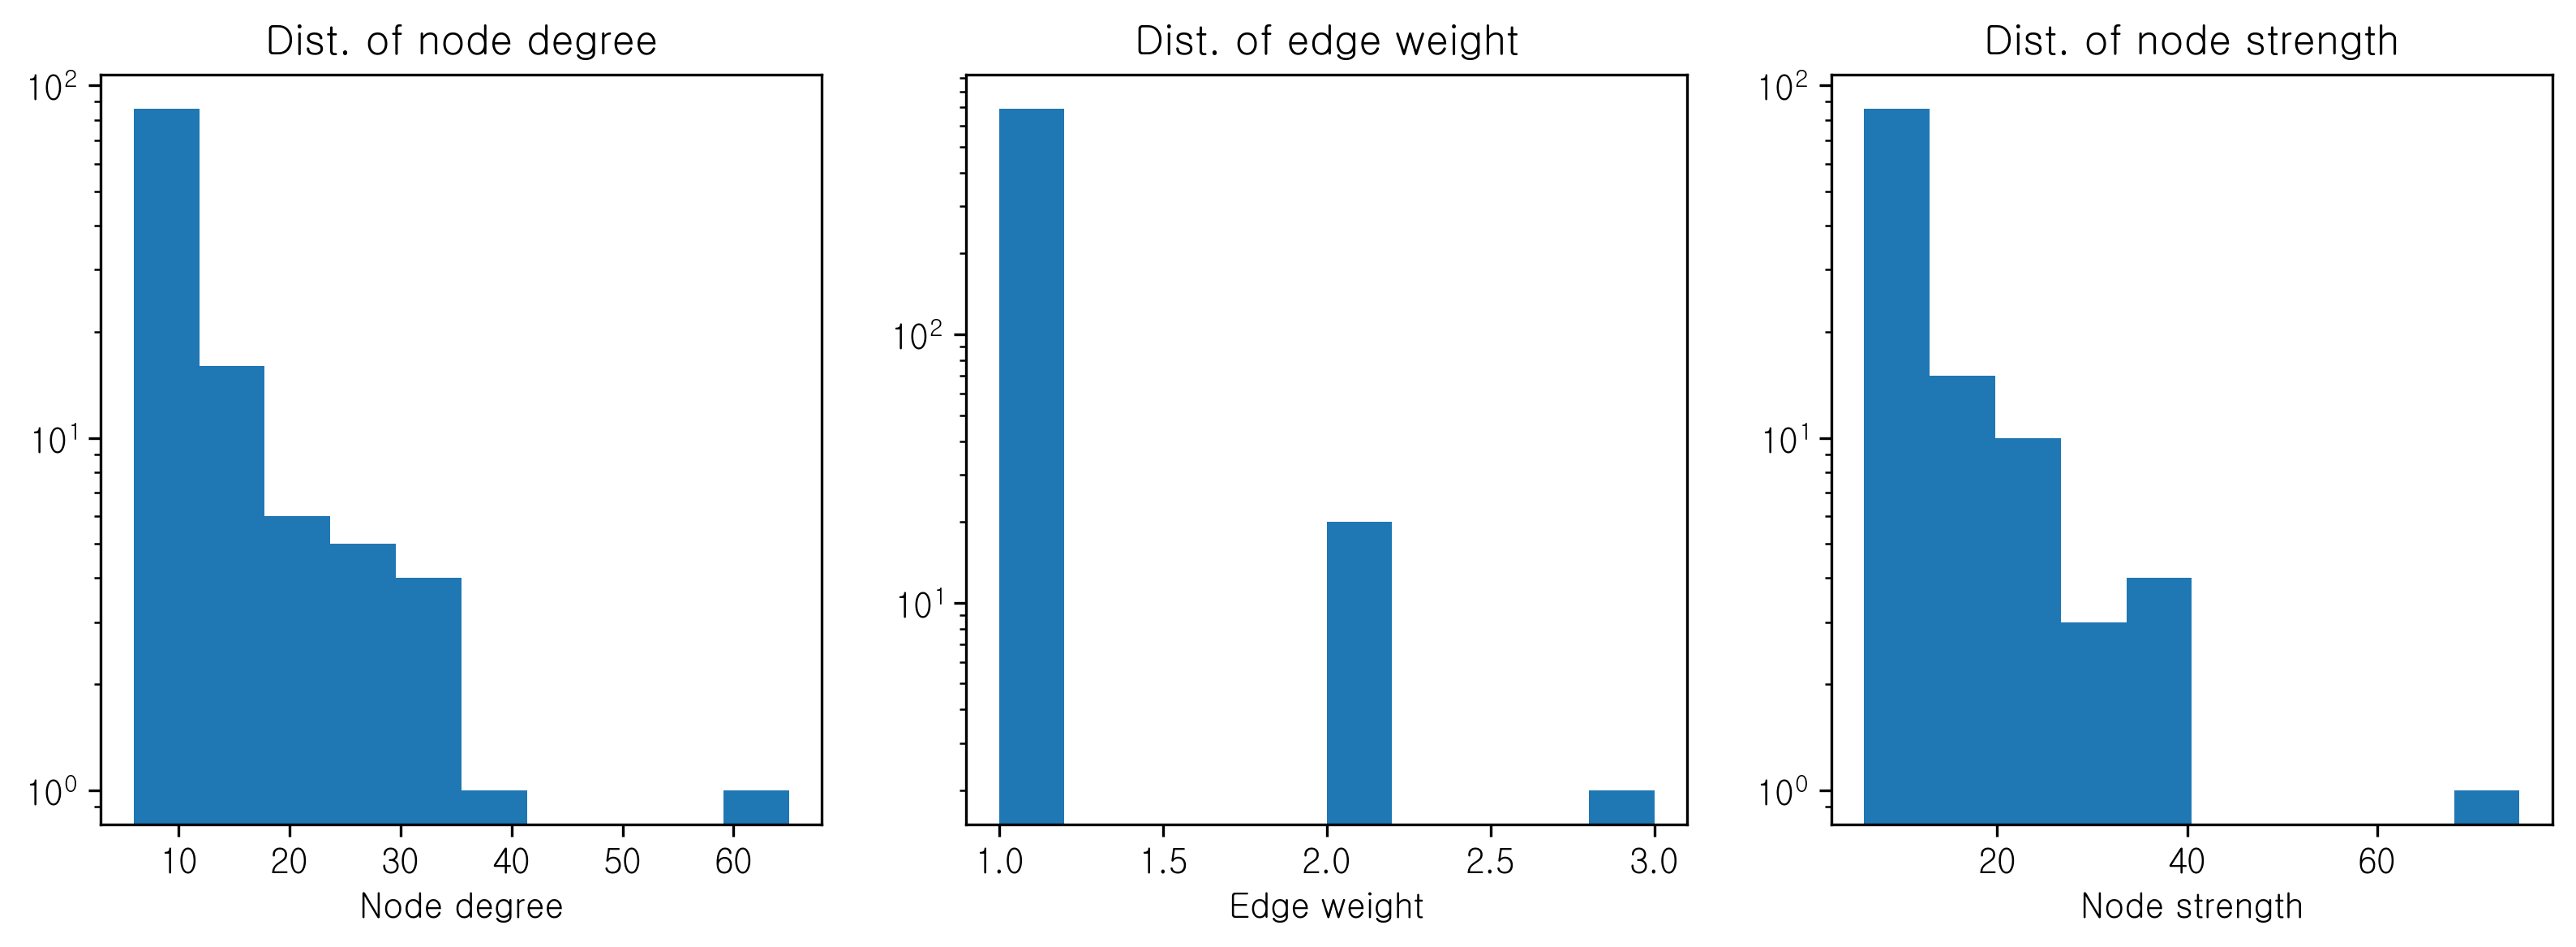

In [44]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) 

Calculating best minimal value for power law fit


D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_diff)**2


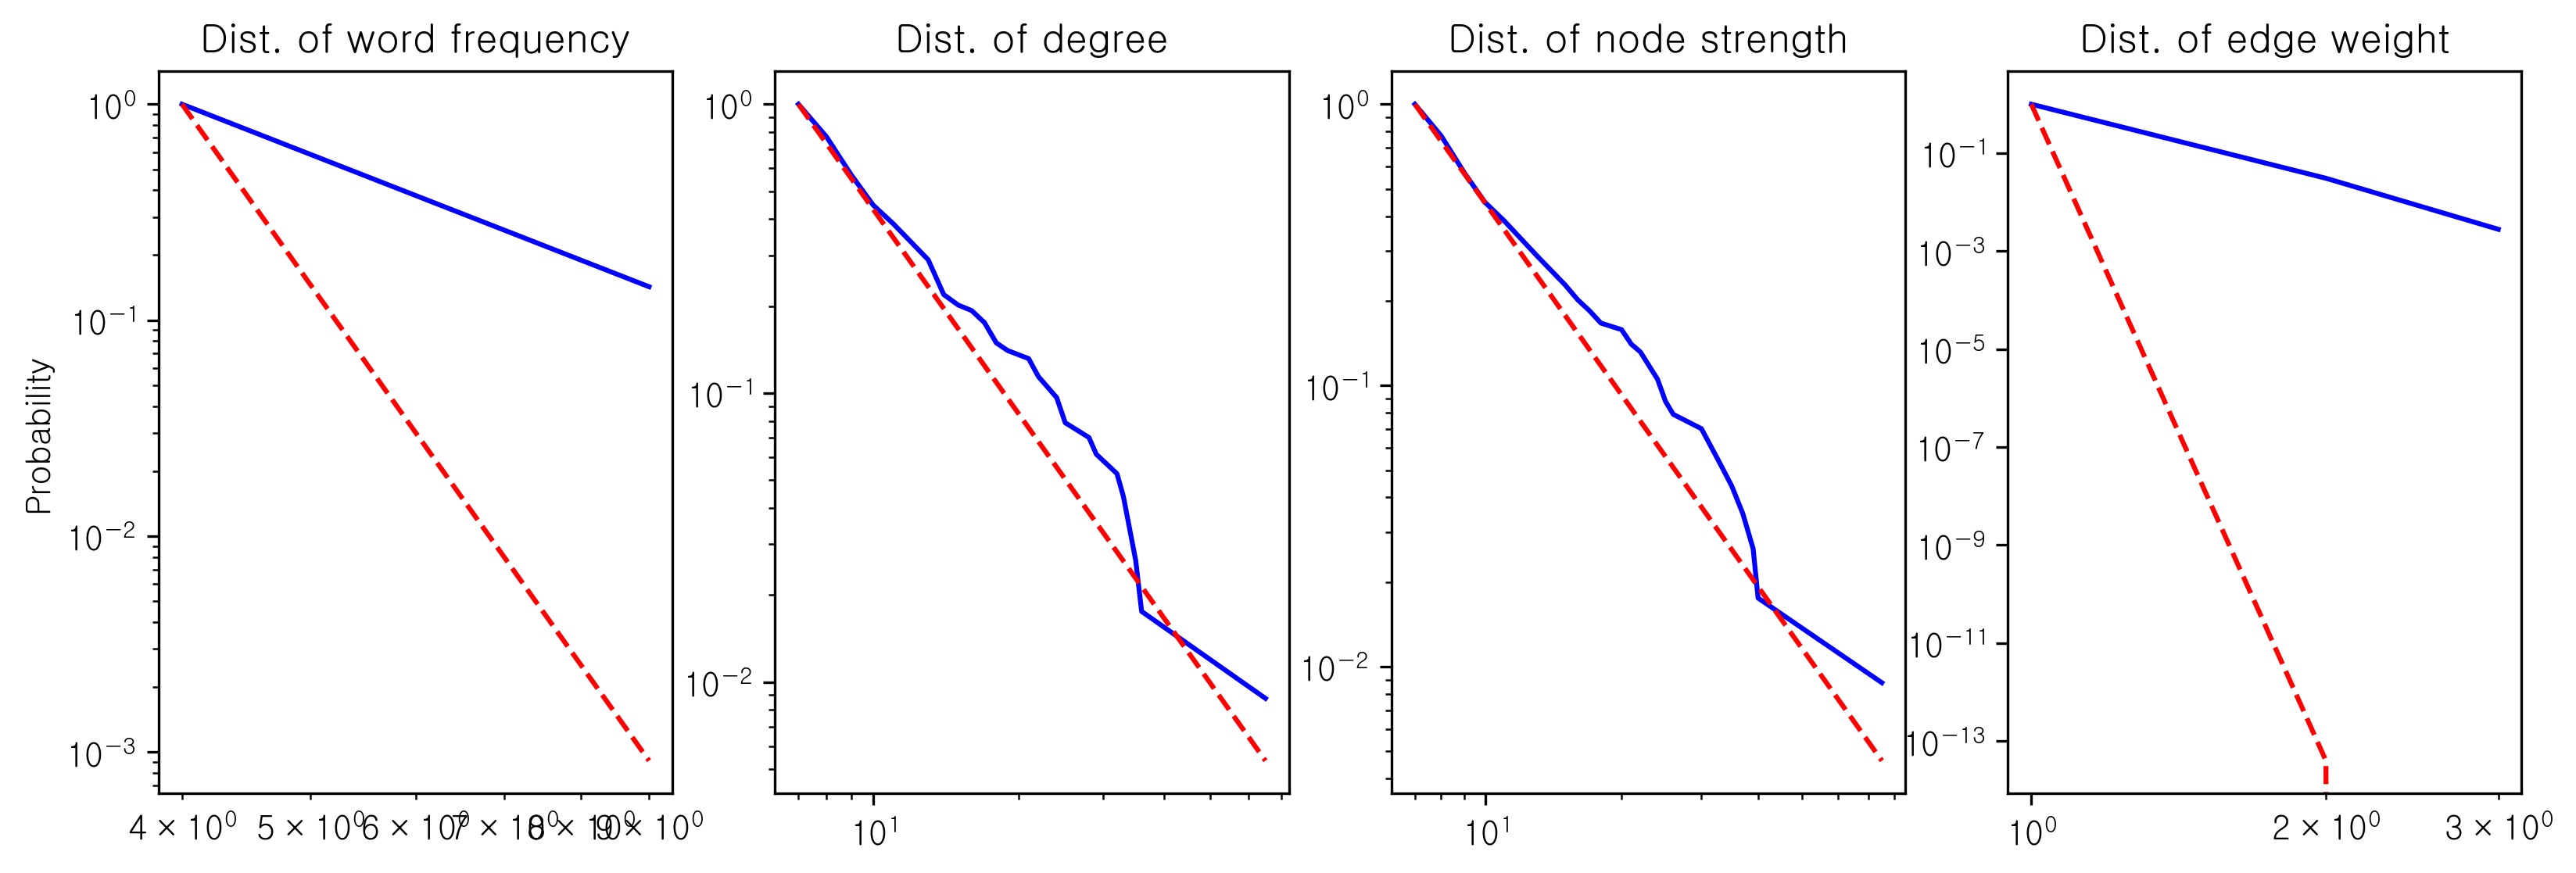

In [45]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [46]:
df = info(G)
df.head(20)

Node_F  Node Frequency            Node_ND  Node Degree  \
0             Explain             9.0            Explain         65.0   
1             Various             4.0          Principle         36.0   
2               Apply             4.0              Light         35.0   
3             Example             4.0              Apply         33.0   
4           Applicate             4.0          Applicate         33.0   
5           Principle             4.0            Various         32.0   
6               Light             4.0            Example         29.0   
7   Mechanical_energy             3.0                Use         28.0   
8           Transform             3.0             Energy         25.0   
9              Energy             3.0         Technology         24.0   
10         Technology             3.0          Recognize         24.0   
11                Use             3.0          Procedure         22.0   
12                Act             2.0             Sensor         22.0   
13       Relationship             2.0          Transform         21.0   
14   Conservation_law             2.0             Effect         21.0   
15         Understand             2.0      Semiconductor         19.0   
16               Heat             2.0  Mechanical_energy         18.0   
17        Demonstrate             2.0        Demonstrate         17.0   
18          Procedure             2.0               Save         17.0   
19      Everyday_life             2.0         Phenomenon         17.0   

              Node_NS  Node Strength                              Edge  \
0             Explain           75.0              (Explain, Applicate)   
1               Light           40.0                  (Explain, Light)   
2           Applicate           39.0                (Various, Explain)   
3           Principle           37.0                   (Various, Save)   
4             Various           35.0              (Various, Applicate)   
5               Apply           33.0      (Explain, Mechanical_energy)   
6             Example           30.0                   (Explain, Save)   
7                 Use           30.0              (Explain, Principle)   
8              Energy           26.0                    (Explain, Use)   
9          Technology           25.0          (Explain, Semiconductor)   
10          Transform           24.0  (Relationship, Conservation_law)   
11          Recognize           24.0   (Mechanical_energy, Understand)   
12  Mechanical_energy           22.0         (Mechanical_energy, Heat)   
13          Procedure           22.0    (Mechanical_energy, Transform)   
14             Sensor           22.0                 (Heat, Transform)   
15             Effect           21.0               (Transform, Energy)   
16               Save           20.0             (Example, Technology)   
17      Semiconductor           20.0        (Everyday_life, Applicate)   
18         Phenomenon           18.0                 (Save, Applicate)   
19        Demonstrate           17.0                (Applicate, Light)   

    Edge Weight            Node_BC  Betweenness Centrality  
0             3            Explain                0.355189  
1             3              Apply                0.175339  
2             2            Various                0.175326  
3             2        Demonstrate                0.143430  
4             2          Principle                0.141487  
5             2            Example                0.139287  
6             2              Light                0.121124  
7             2          Applicate                0.107025  
8             2          Transform                0.093537  
9             2             Energy                0.090565  
10            2  Mechanical_energy                0.087603  
11            2                Use                0.085981  
12            2          Procedure                0.083675  
13            2                Act                0.082364  
14         

# 역학과 에너지

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


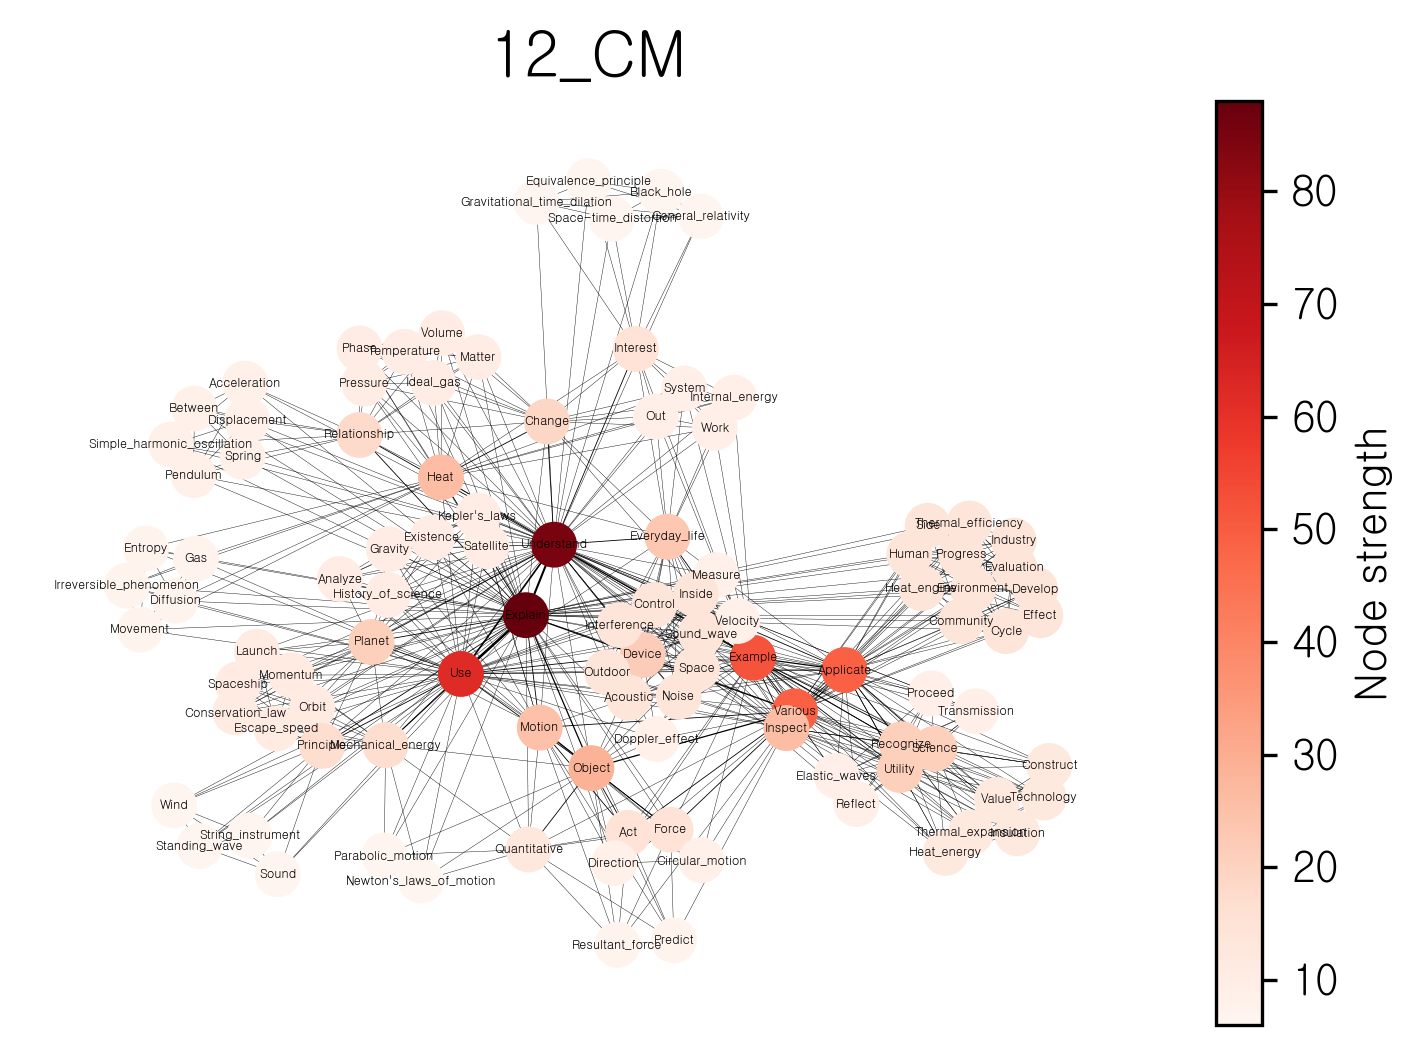

In [47]:
subject_graph(2, file_lst[4], '12_CM')

In [48]:
G = graph(2, file_lst[4])

In [49]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 715
WordFreq avg: 1.53, WordFreq std: 1.46
Degree avg: 13.62, Degree std: 10.54
NodeWeight avg: 14.88, NodeWeight std: 13.66
EdgeWeight avg: 1.09, EdgeWeight std: 0.39


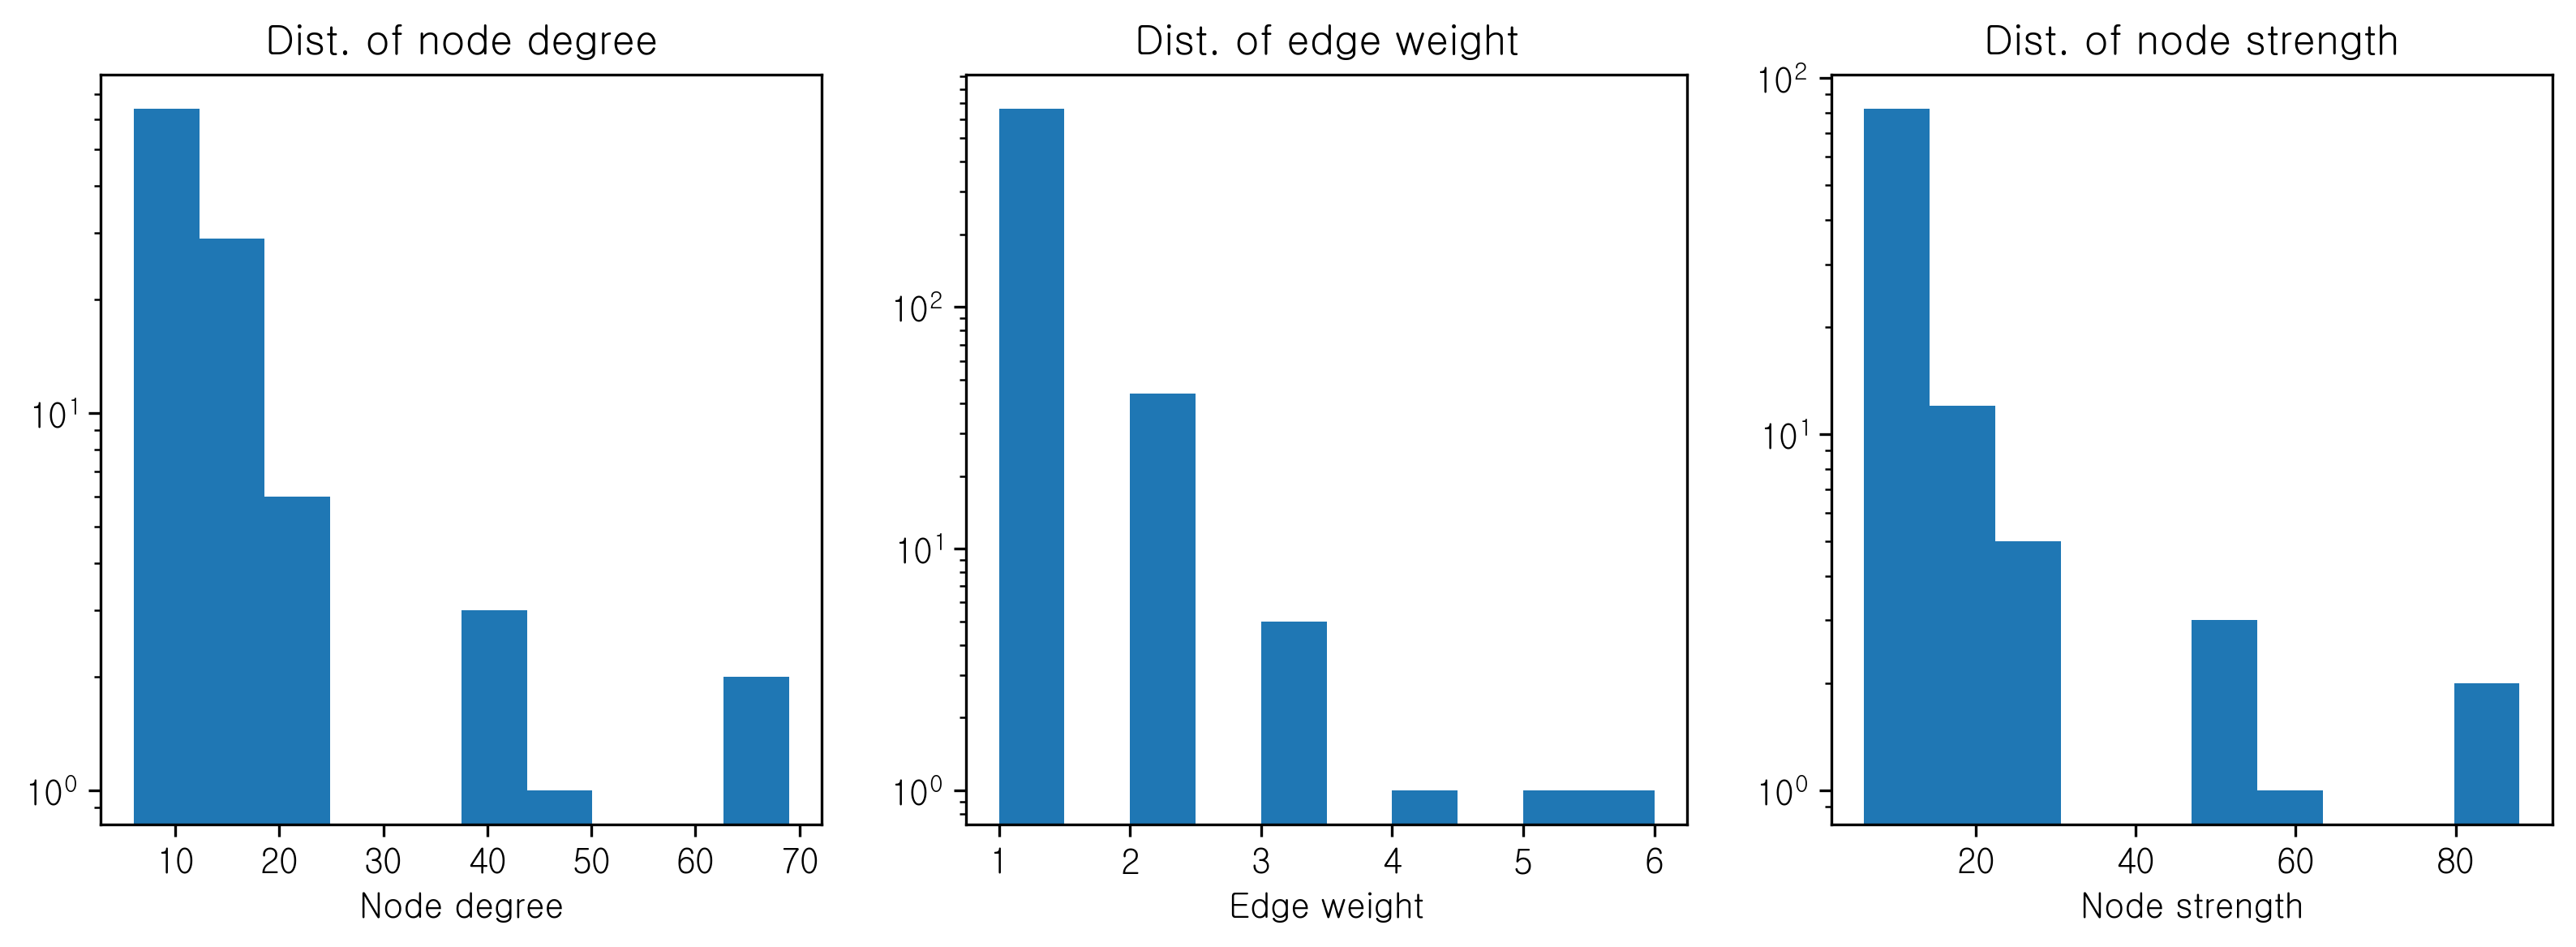

In [50]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
2: Pass, 3.0040675462513686

Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


3: Pass, 2.687549315988754

Calculating best minimal value for power law fit


Assuming nested distributions


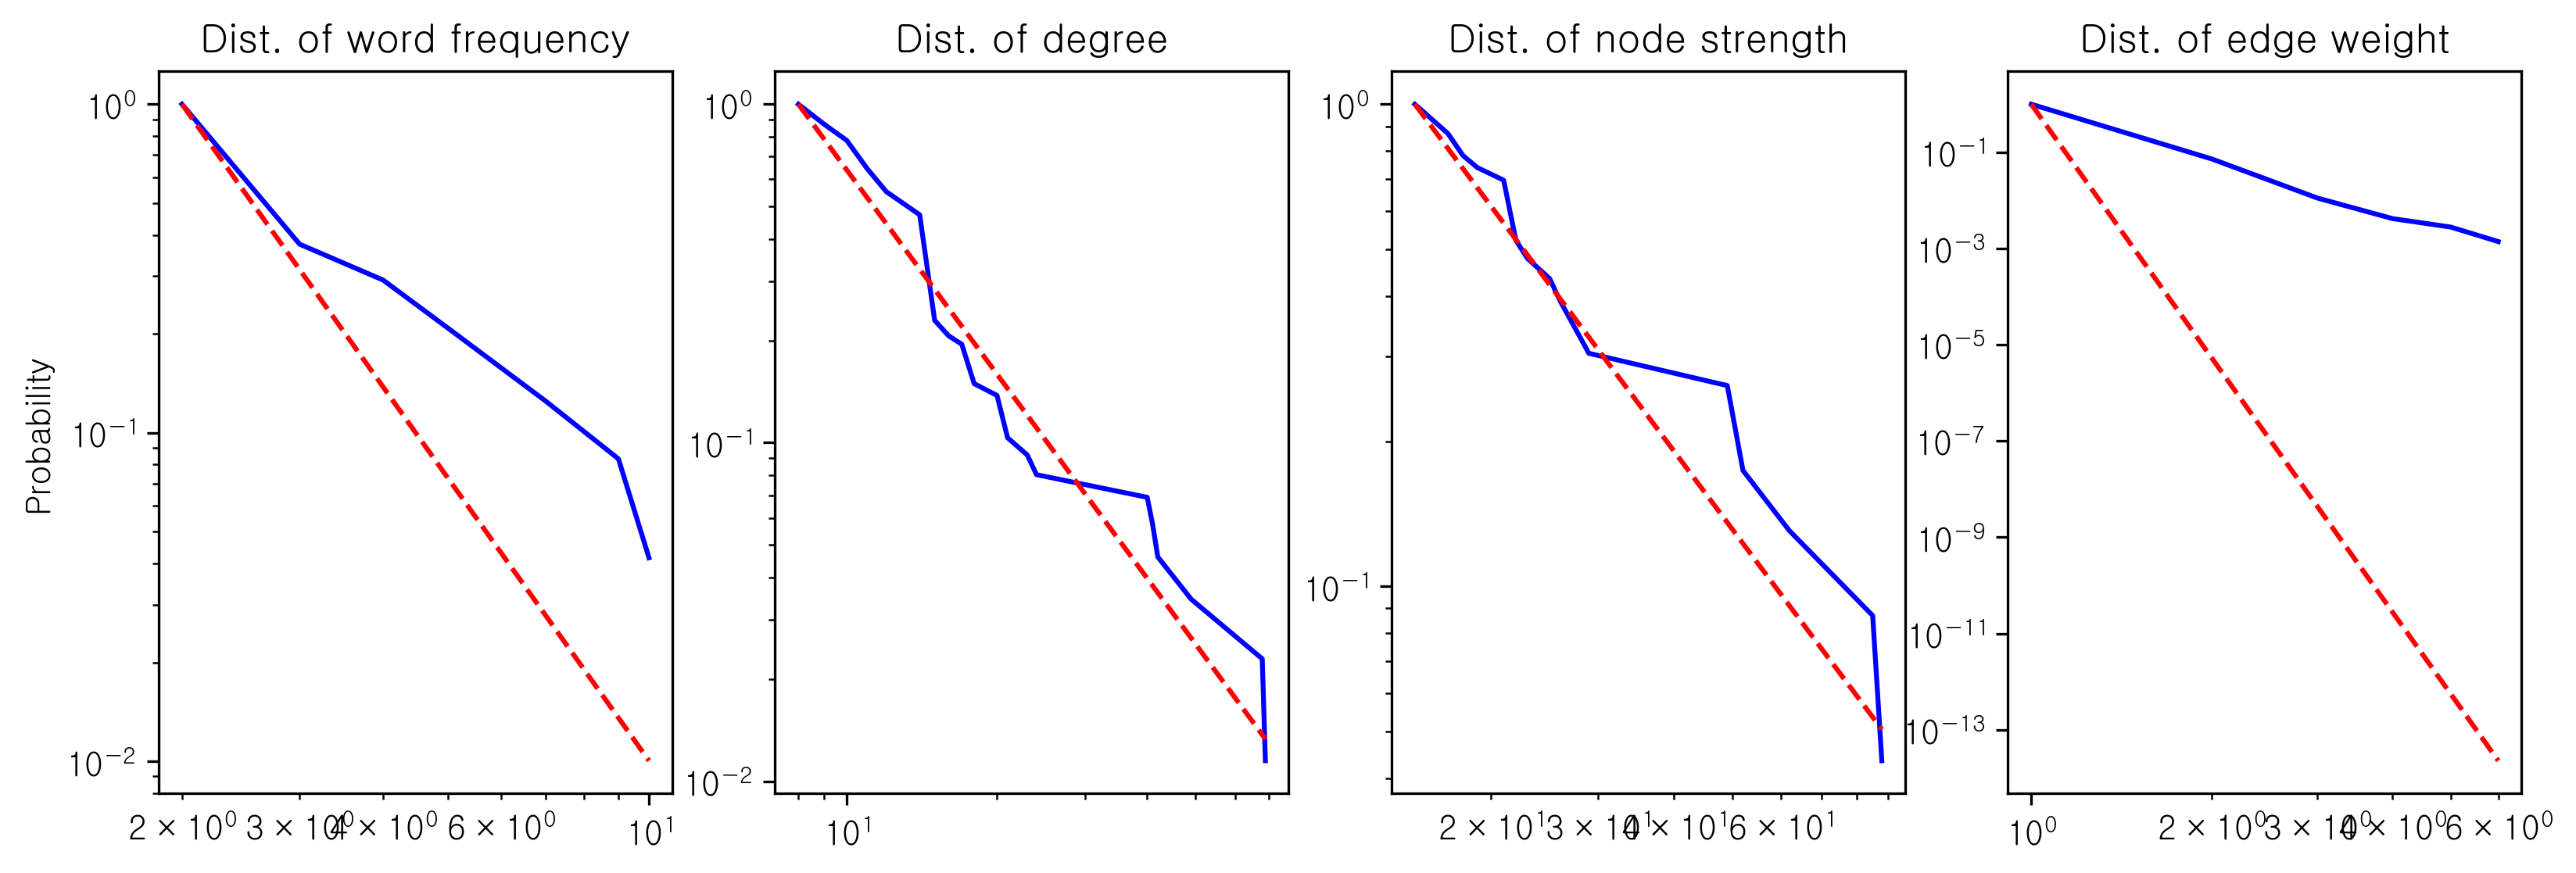

In [51]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [52]:
df = info(G)
df.head(20)

Node_F  Node Frequency            Node_ND  Node Degree  \
0             Explain            10.0            Explain         69.0   
1          Understand             9.0         Understand         68.0   
2                 Use             7.0                Use         49.0   
3             Various             5.0            Example         42.0   
4             Example             5.0          Applicate         41.0   
5              Object             4.0            Various         40.0   
6           Applicate             4.0            Inspect         24.0   
7              Motion             3.0               Heat         23.0   
8                Heat             3.0      Everyday_life         21.0   
9                 Act             2.0             Motion         20.0   
10              Force             2.0             Object         20.0   
11       Quantitative             2.0             Device         20.0   
12  Mechanical_energy             2.0             Planet         18.0   
13             Planet             2.0          Recognize         17.0   
14          Principle             2.0            Utility         17.0   
15           Interest             2.0            Science         17.0   
16            Inspect             2.0             Change         17.0   
17          Recognize             2.0       Relationship         16.0   
18            Utility             2.0  Mechanical_energy         15.0   
19            Science             2.0          Principle         15.0   

              Node_NS  Node Strength                    Edge  Edge Weight  \
0             Explain           88.0          (Use, Explain)            6   
1          Understand           85.0   (Explain, Understand)            5   
2                 Use           62.0       (Use, Understand)            4   
3             Example           52.0       (Various, Object)            3   
4             Various           49.0      (Various, Explain)            3   
5           Applicate           49.0       (Object, Explain)            3   
6              Object           29.0    (Example, Applicate)            3   
7             Inspect           26.0   (Example, Understand)            3   
8                Heat           26.0            (Act, Force)            2   
9              Motion           25.0           (Act, Motion)            2   
10      Everyday_life           23.0          (Act, Various)            2   
11             Device           22.0           (Act, Object)            2   
12             Planet           21.0         (Force, Motion)            2   
13          Recognize           21.0        (Force, Various)            2   
14            Utility           21.0         (Force, Object)            2   
15            Science           21.0       (Motion, Various)            2   
16             Change           19.0        (Motion, Object)            2   
17       Relationship           18.0       (Motion, Explain)            2   
18  Mechanical_energy           17.0  (Quantitative, Object)            2   
19          Principle           17.0      (Various, Example)            2   

              Node_BC  Betweenness Centrality  
0             Explain                0.319073  
1          Understand                0.316466  
2                 Use                0.194349  
3             Various                0.162439  
4             Example                0.152214  
5           Applicate                0.148446  
6                Heat                0.088626  
7              Object                0.071094  
8              Motion                0.066415  
9       Everyday_life                0.060420  
10            Inspect                0.059062  
11           Interest                0.058874  
12       Relationship                0.054893  
13             Change                0.052301  
14             Device                0.048957  
15             Planet                0.048043  
16          Principle                0.043255  

# 전자기와 양자

C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_18600\1697088581.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


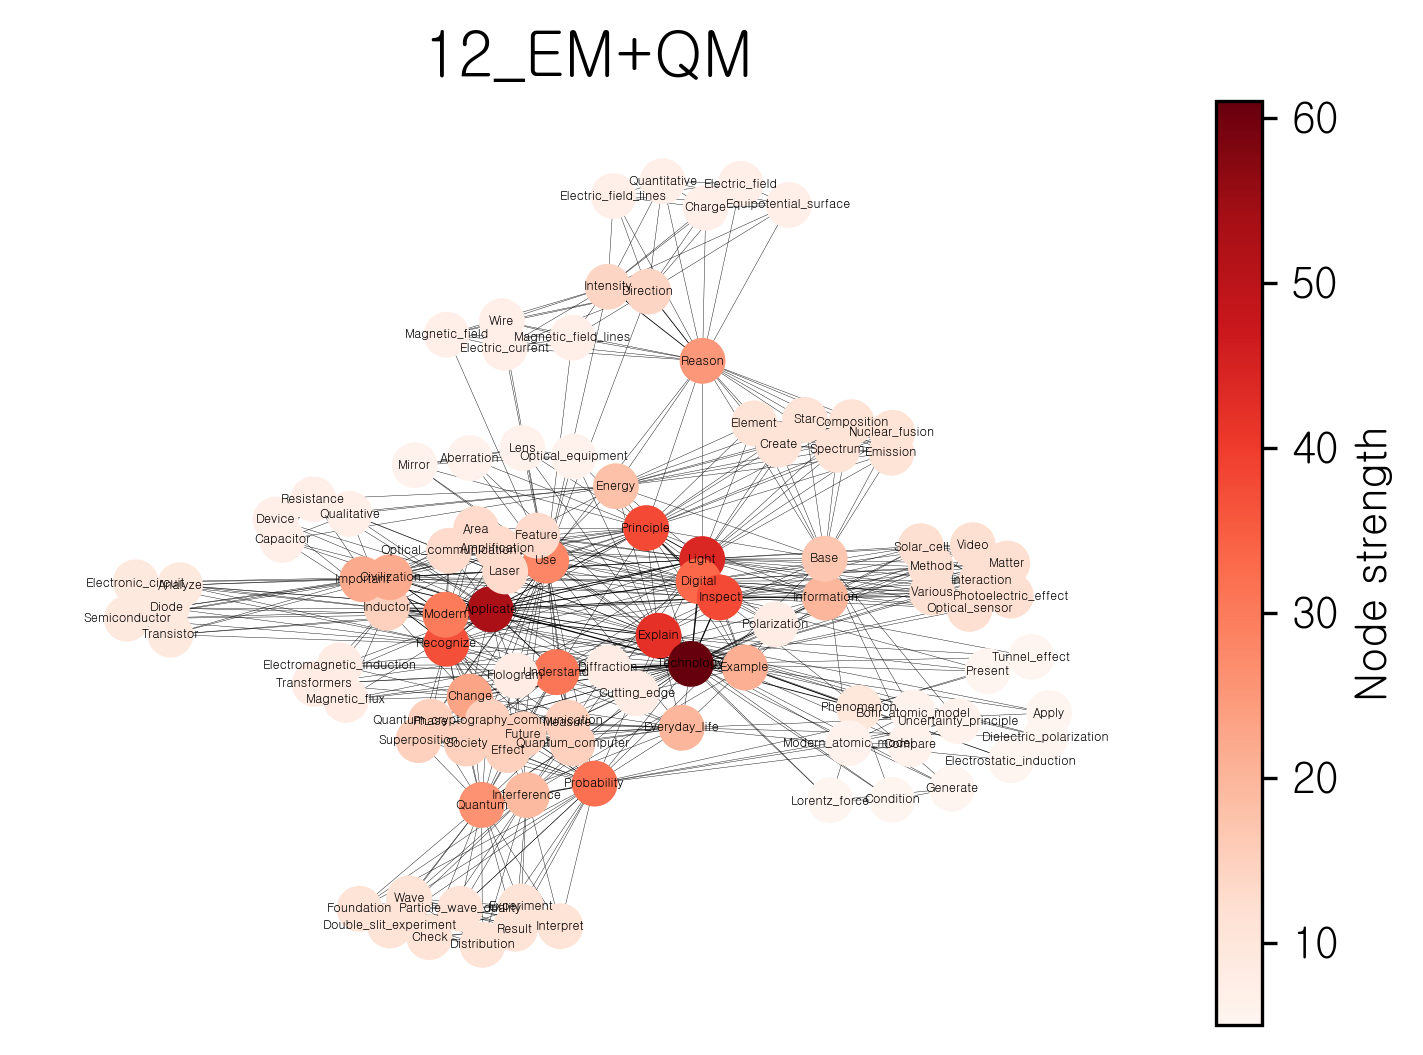

In [53]:
subject_graph(2, file_lst[5], '12_EM+QM')

In [54]:
G = graph(2, file_lst[5])

In [55]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 695
WordFreq avg: 1.52, WordFreq std: 1.16
Degree avg: 13.24, Degree std: 8.41
NodeWeight avg: 14.19, NodeWeight std: 10.48
EdgeWeight avg: 1.07, EdgeWeight std: 0.29


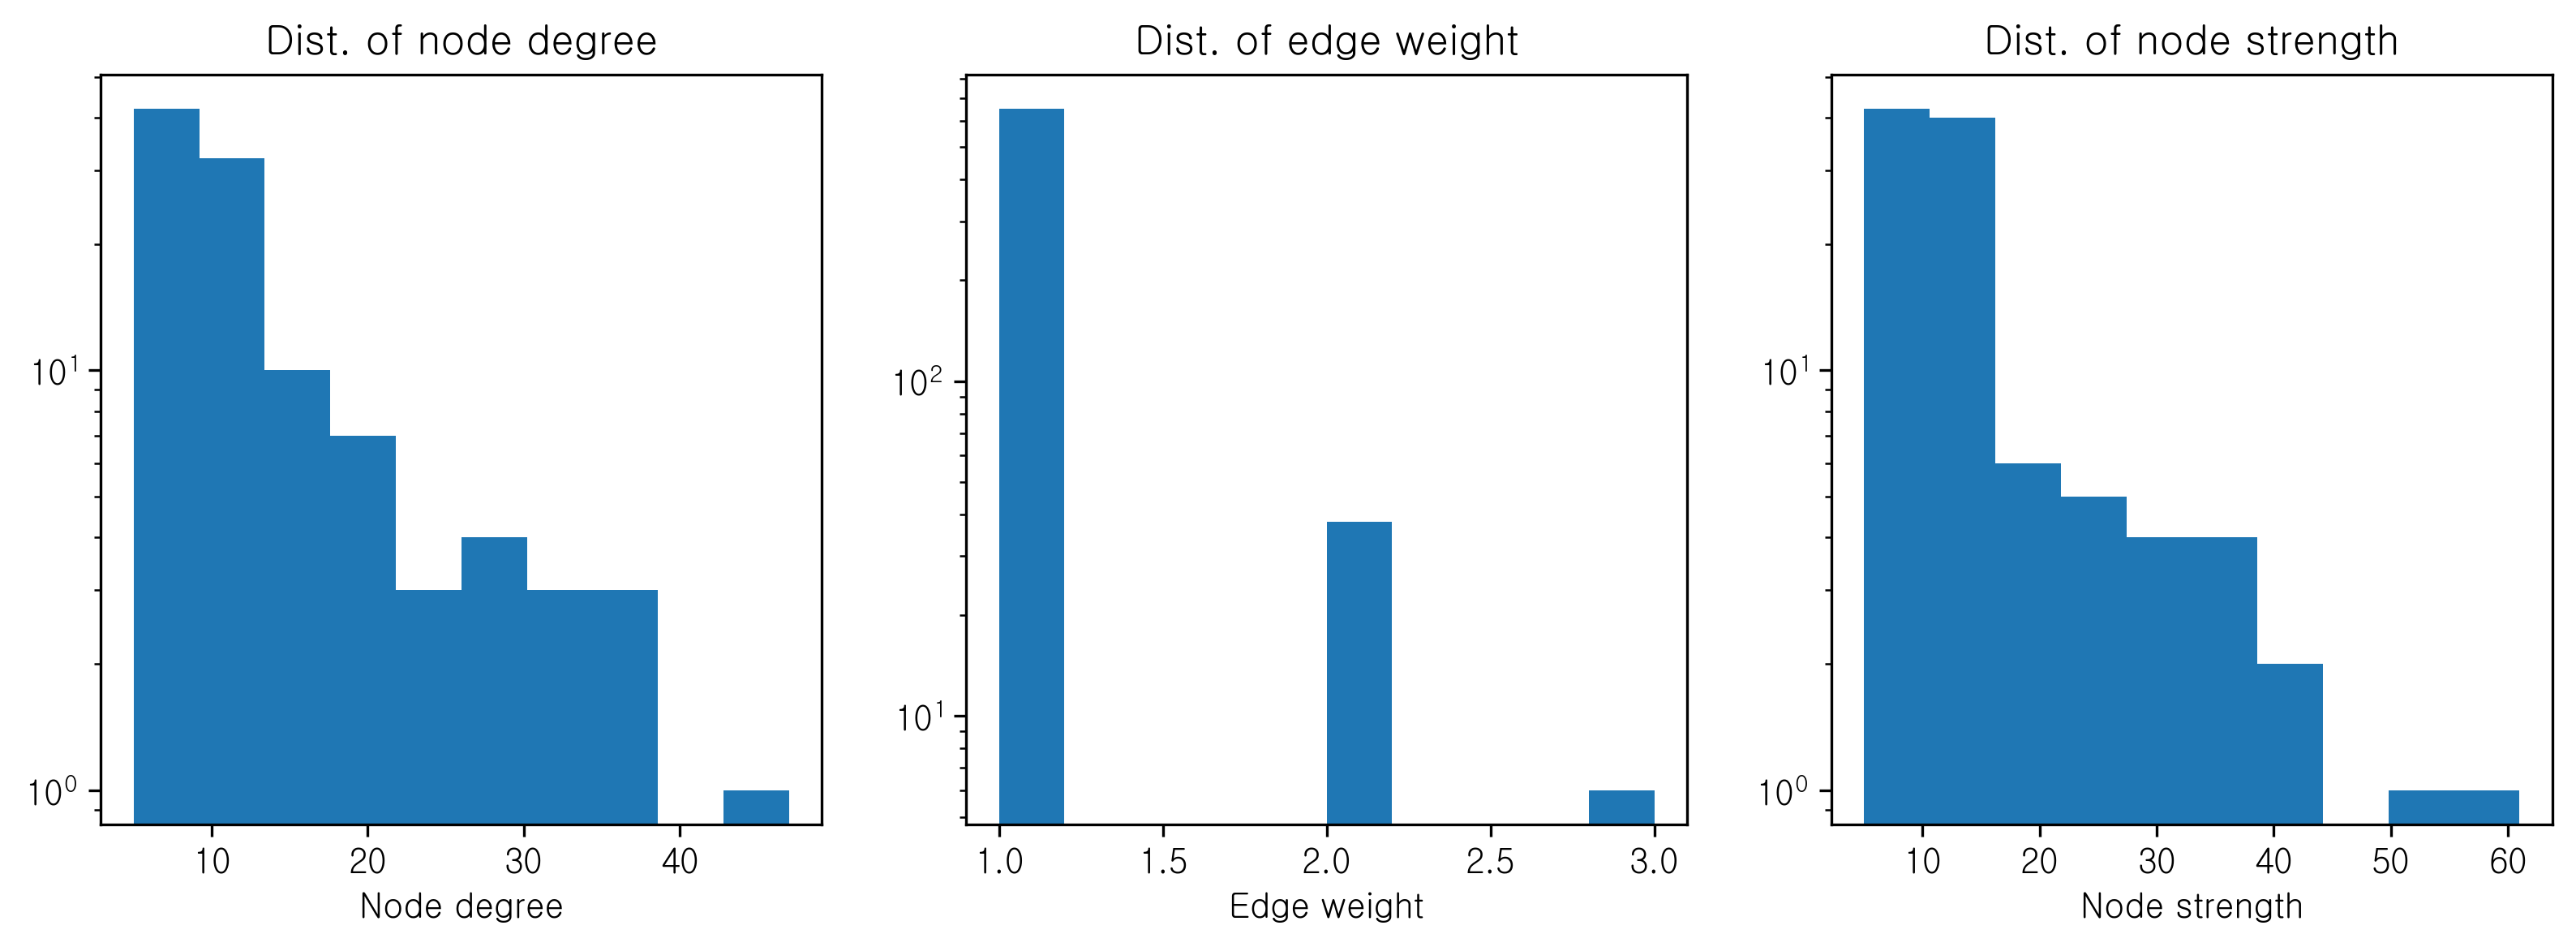

In [56]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


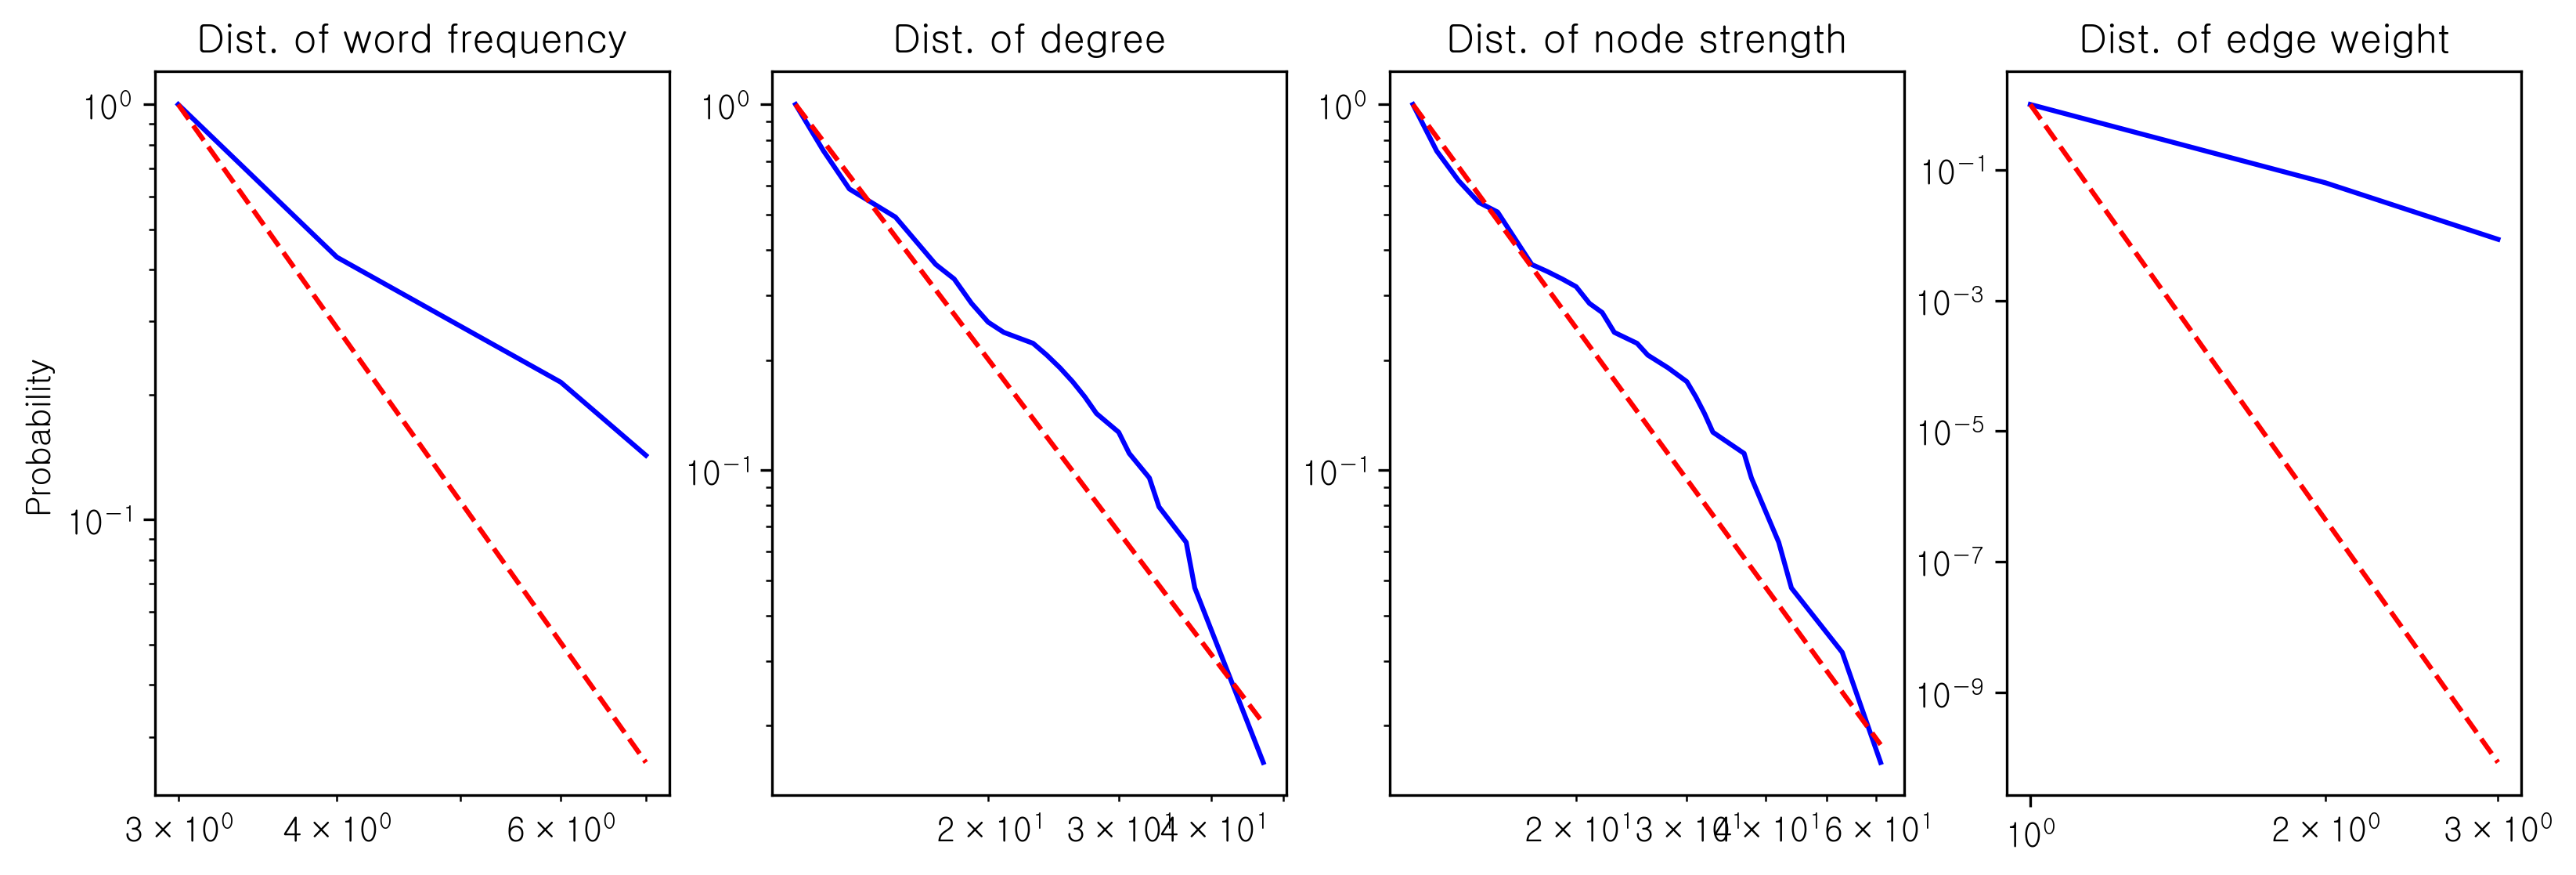

In [57]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [58]:
df = info(G)
df.head(20)

Node_F  Node Frequency        Node_ND  Node Degree        Node_NS  \
0         Explain             7.0     Technology         47.0     Technology   
1      Technology             7.0      Applicate         38.0      Applicate   
2       Applicate             6.0          Light         38.0          Light   
3           Light             4.0        Explain         37.0        Explain   
4       Principle             4.0      Principle         34.0      Principle   
5         Inspect             4.0      Recognize         33.0        Inspect   
6          Reason             3.0    Probability         31.0      Recognize   
7         Example             3.0        Inspect         30.0        Digital   
8             Use             3.0            Use         28.0    Probability   
9      Understand             3.0     Understand         27.0     Understand   
10      Recognize             3.0        Digital         26.0         Modern   
11         Modern             3.0        Quantum         25.0            Use   
12        Digital             3.0         Modern         24.0        Quantum   
13    Probability             3.0         Reason         23.0         Reason   
14      Direction             2.0         Change         21.0         Change   
15      Intensity             2.0  Everyday_life         20.0      Important   
16  Everyday_life             2.0        Example         19.0   Civilization   
17     Phenomenon             2.0   Interference         19.0        Example   
18         Change             2.0         Energy         18.0  Everyday_life   
19       Inductor             2.0      Important         18.0    Information   

    Node Strength                       Edge  Edge Weight        Node_BC  \
0            61.0      (Explain, Technology)            3     Technology   
1            53.0   (Technology, Understand)            3        Explain   
2            44.0    (Technology, Applicate)            3            Use   
3            42.0      (Technology, Inspect)            3          Light   
4            38.0        (Applicate, Modern)            3      Applicate   
5            38.0         (Digital, Inspect)            3         Reason   
6            37.0     (Direction, Intensity)            2      Principle   
7            33.0        (Direction, Reason)            2    Probability   
8            32.0        (Intensity, Reason)            2      Recognize   
9            31.0      (Explain, Phenomenon)            2        Inspect   
10           30.0       (Explain, Applicate)            2        Quantum   
11           28.0        (Explain, Inductor)            2     Understand   
12           26.0      (Example, Technology)            2   Interference   
13           25.0       (Example, Applicate)            2           Base   
14           23.0   (Phenomenon, Technology)            2         Energy   
15           22.0       (Technology, Change)            2        Digital   
16           22.0        (Technology, Light)            2         Modern   
17           21.0  (Technology, Information)            2        Example   
18           20.0      (Technology, Digital)            2  Everyday_life   
19           20.0    (Understand, Applicate)            2         Change   

    Betweenness Centrality  
0                 0.202466  
1                 0.190485  
2                 0.164825  
3                 0.157158  
4                 0.153970  
5                 0.149024  
6                 0.146557  
7                 0.133925  
8                 0.111917  
9                 0.095564  
10                0.089157  
11                0.082726  
12                0.079626  
13                0.075782  
14                0.072094  
15                0.072008  
16                0.068813  
17                0.064951  
18                0.056527  
19                0.056186